In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
from mlxtend import plotting
import seaborn as sns
import numpy as np
from sklearn.datasets import  make_circles, make_moons
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, balanced_accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier

import pickle

import xlwt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# https://www.kaggle.com/datasets/reihanenamdari/fire-incidents
input_directory = '/Users/user/Documents/InfoShareAcademy/23.04.24_Sprint_03_ML/Projekt_ML/dane/Fire-Incidents.csv'
fire_data = pd.read_csv(input_directory)

In [4]:
fire_data

Area_of_Origin  \
0                                       Porch or Balcony   
1                                Cooking Area or Kitchen   
2         Living Area (e.g. living, TV, recreation, etc)   
3                            Undetermined  (formerly 98)   
4      Sleeping Area or Bedroom (inc. patients room, ...   
...                                                  ...   
11209  Trash, Rubbish Storage (inc garbage chute room...   
11210                                 Other Storage Area   
11211                                 Other Storage Area   
11212                                   Porch or Balcony   
11213  Trash, Rubbish Storage (inc garbage chute room...   

                       Business_Impact  Civilian_Casualties  \
0             No business interruption                    0   
1                         Undetermined                    0   
2      Not applicable (not a business)                    1   
3            May not resume operations                    0   
4      Not applicable (not a business)                    8   
...                                ...                  ...   
11209         No business interruption                    0   
11210         No business interruption                    0   
11211         No business interruption                    0   
11212  Not applicable (not a business)                    6   
11213         No business interruption                    0   

       Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                            86                   3000   
1                            28                  50000   
2                            16                1000000   
3                            12                1000000   
4                            11                 125000   
...                         ...                    ...   
11209                         0                      0   
11210                         0                   1000   
11211                         0                      0   
11212                         0                 100000   
11213                         0                    100   

       Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                          0         2018-08-24T17:06:26   
1                                         28         2018-11-24T07:19:00   
2                                        130         2017-02-09T18:02:13   
3                                         14         2012-10-30T00:52:04   
4                                          2         2018-07-08T04:35:00   
...                                      ...                         ...   
11209                                      0         2018-02-23T14:41:51   
11210                                      0         2018-02-24T01:42:03   
11211                                      0         2018-02-24T02:40:00   
11212                                      1         2018-02-24T00:44:00   
11213                                      0         2018-02-24T08:33:18   

                                 Extent_Of_Fire  \
0                  Confined to object of origin   
1       Confined to part of room/area of origin   
2      Spread beyond room of origin, same floor   
3                              Entire Structure   
4      Spread beyond room of origin, same floor   
...                                         ...   
11209              Confined to object of origin   
11210              Confined to object of origin   
11211              Confined to object of origin   
11212   Confined to part of room/area of origin   
11213              Confined to object of origin   

                  Fire_Alarm_System_Impact_on_Evacuation  \
0      Not applicable: Occupant(s) first alerted by o...   
1      Not applicable: Occupant(s) first alerted by o...   
2      Some persons (at risk) evacuated as a result o...   
3                                           Undetermined   
4      Some persons (at risk) evacuated a

In [6]:
fire_data.nunique()

Area_of_Origin                                 73
Business_Impact                                 7
Civilian_Casualties                            10
Count_of_Persons_Rescued                       14
Estimated_Dollar_Loss                         191
Estimated_Number_Of_Persons_Displaced          61
Ext_agent_app_or_defer_time                 11210
Extent_Of_Fire                                 12
Fire_Alarm_System_Impact_on_Evacuation          7
Fire_Alarm_System_Operation                     4
Fire_Alarm_System_Presence                      4
Fire_Under_Control_Time                     11205
Ignition_Source                                82
Incident_Station_Area                          84
Incident_Ward                                  44
Last_TFS_Unit_Clear_Time                    11213
Latitude                                     6070
Longitude                                    6399
Material_First_Ignited                         54
Method_Of_Fire_Control                          5


In [7]:
fire_data['Civilian_Casualties'].nunique()

10

In [8]:
fire_data['Civilian_Casualties'].unique()

array([ 0,  1,  8,  2, 15,  6,  5,  4,  3,  7])

In [5]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [6]:
fire_data.isna().sum()

Area_of_Origin                               0
Business_Impact                              0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Dollar_Loss                        0
Estimated_Number_Of_Persons_Displaced        0
Ext_agent_app_or_defer_time                  0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use 

In [7]:
fire_data[fire_data['Incident_Ward'].isna()].head(10)

Area_of_Origin  \
907                                              Garage   
1442                                 Electrical Systems   
1921                Mechanical/Electrical Services Room   
2973  Sleeping Area or Bedroom (inc. patients room, ...   
3193                            Cooking Area or Kitchen   
3330                Mechanical/Electrical Services Room   
3398                            Cooking Area or Kitchen   
3911  Trash, Rubbish Storage (inc garbage chute room...   
4256                                      Exterior Wall   
4326                                             Garage   

                      Business_Impact  Civilian_Casualties  \
907                      Undetermined                    0   
1442         No business interruption                    0   
1921         No business interruption                    0   
2973  Not applicable (not a business)                    0   
3193  Not applicable (not a business)                    0   
3330                     Undetermined                    0   
3398         No business interruption                    0   
3911                     Undetermined                    0   
4256  Not applicable (not a business)                    0   
4326         No business interruption                    1   

      Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
907                          0                      0   
1442                         0                   4000   
1921                         0                   1000   
2973                         0                  20000   
3193                         0                   5000   
3330                         0                  10000   
3398                         0                  12000   
3911                         0                   1000   
4256                         0                   2000   
4326                         0                  10000   

      Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
907                                       0         2019-01-25T18:57:07   
1442                                      0         2019-02-15T12:20:10   
1921                                      0         2018-07-11T10:41:04   
2973                                      7         2011-02-12T18:15:00   
3193                                      6         2011-05-14T18:33:00   
3330                                    997         2011-07-24T12:12:11   
3398                                      3         2011-08-28T20:34:00   
3911                                      0         2013-10-18T11:01:01   
4256                                      0         2015-01-22T23:04:32   
4326                                      0         2017-11-28T14:36:00   

                               Extent_Of_Fire  \
907              Confined to object of origin   
1442             Confined to object of origin   
1921  Confined to part of room/area of origin   
2973          Spread to entire room of origin   
3193  Confined to part of room/area of origin   
3330  Confined to part of room/area of origin   
3398  Confined to part of room/area of origin   
3911  Confined to part of room/area of origin   
4256             Confined to object of origin   
4326  Confined to part of room/area of origin   

                 Fire_Alarm_System_Impact_on_Evacuation  \
907   Not applicable: No fire alarm system, no perso...   
1442  All persons (at risk of injury) evacuated as a...   
1921                                       Undetermined   
2973  Not applicable: No fire alarm system, no perso...   
3193  Not applicable: No fire alarm system, no perso...   
3330                                       Undetermined   
3398  All persons (at risk of injury) evacuated as a...   
3911  Not applicable: Occupant(s) first alerted by o...   
4256                                       Undetermined   
4326  Not applicable: No fire alarm system, no perso...   

                   Fire_Alarm_System_Operation  ... Longitude  \

In [8]:
fire_data['Incident_Ward'].unique()

array([18.,  7., 27., 20.,  5., 15., 14., 17., 29.,  9.,  8., 42., 22.,
       36., 43.,  1., 28., 33., 24., 35., 37., 30., 34., 11., 10.,  6.,
       21.,  4., 19., 26., 44., 32., 23., 25., 38., 31.,  2., 13., 12.,
       16.,  3., 40., 41., nan, 39.])

In [9]:
fire_data.shape

(11214, 27)

In [10]:
fire_data.describe()

Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
count            11214.000                 11214.000              11214.000   
mean                 0.113                     0.062              42943.693   
std                  0.456                     0.963             533936.667   
min                  0.000                     0.000                  0.000   
25%                  0.000                     0.000                250.000   
50%                  0.000                     0.000               2500.000   
75%                  0.000                     0.000              15000.000   
max                 15.000                    86.000           50000000.000   

       Estimated_Number_Of_Persons_Displaced  Incident_Station_Area  \
count                              11214.000              11214.000   
mean                                  17.275                288.282   
std                                  119.072                107.516   
min                                    0.000                111.000   
25%                                    0.000                221.000   
50%                                    0.000                314.000   
75%                                    1.000                346.000   
max                                  999.000                445.000   

       Incident_Ward  Latitude  Longitude  
count      11181.000 11214.000  11214.000  
mean          19.583    43.705    -79.403  
std           11.763     0.051      0.101  
min            1.000    43.589    -79.635  
25%           10.000    43.662    -79.479  
50%           19.000    43.697    -79.404  
75%           28.000    43.748    -79.337  
max           44.000    43.846    -79.124

In [9]:
# dodana kolumna 'count' zeby zrobic wyliczenia pivot
fire_data['count']=1

In [12]:
# dane ograniczone do wierszy, dla ktorych ilosc ofiar była większa od 0
fire_data_cut = fire_data[fire_data['Civilian_Casualties']>0]

In [13]:
fire_data.columns

Index(['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties',
       'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss',
       'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Station_Area',
       'Incident_Ward', 'Last_TFS_Unit_Clear_Time', 'Latitude', 'Longitude',
       'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival',
       'TFS_Alarm_Time', 'TFS_Arrival_Time', 'count'],
      dtype='object')

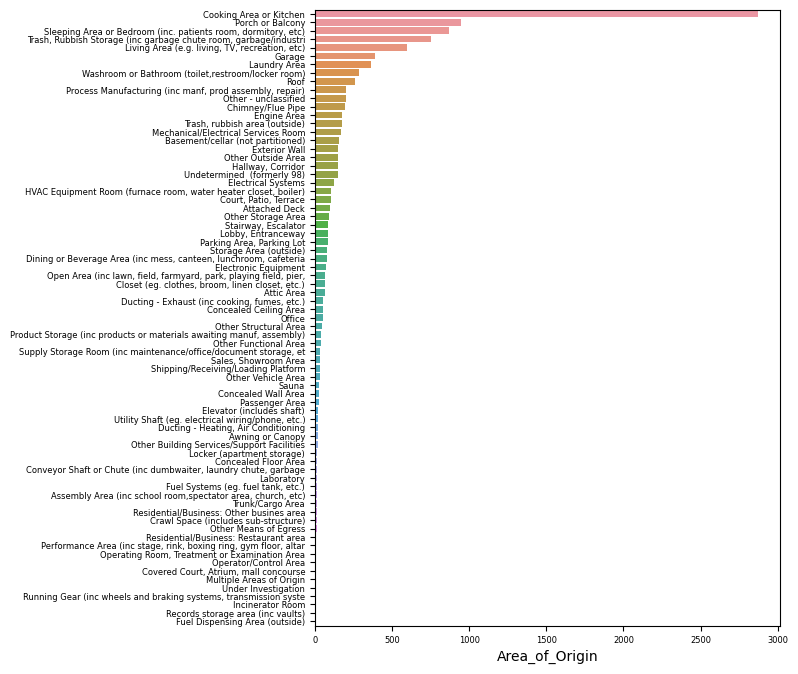

In [14]:
df_area_counts = fire_data['Area_of_Origin'].value_counts()

plt.figure(figsize = (6,8))
a = sns.barplot(x=df_area_counts,y= df_area_counts.index)
a.tick_params(labelsize=6)

plt.show()

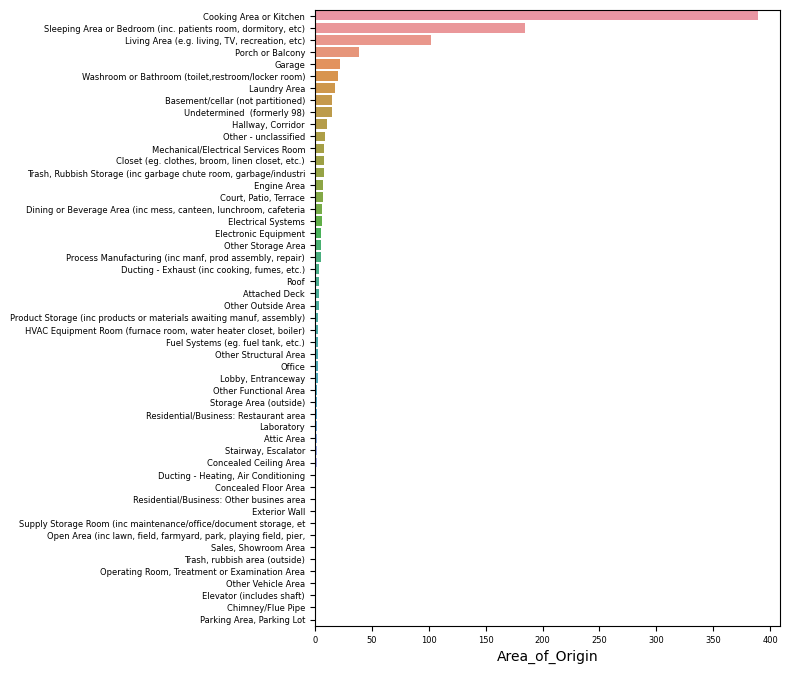

In [15]:
df_area_counts = fire_data_cut['Area_of_Origin'].value_counts()

plt.figure(figsize = (6,8))
a = sns.barplot(x=df_area_counts,y= df_area_counts.index)
a.tick_params(labelsize=6)

plt.show()

In [16]:
# tabela pokazujaca podzial ilosci ofiar >0 versus miejsce pozaru
pivot_origin = fire_data_cut.pivot_table(values='count' ,index='Area_of_Origin', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
#pivot_origin.to_excel('/Users/user/Documents/InfoShareAcademy/23.04.24_Sprint_03_ML/Projekt_ML/dane/Fire_pivot_origin3.xls')
pivot_origin = pivot_origin.sort_values('All',ascending=False)
pivot_origin.head(11)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Area_of_Origin                                                                  
All                                                 770  112  40  19  2  4  1   
Cooking Area or Kitchen                             326   45  11   5  0  1  0   
Sleeping Area or Bedroom (inc. patients room, d...  139   31  12   2  0  0  0   
Living Area (e.g. living, TV, recreation, etc)       78   15   3   3  1  2  0   
Porch or Balcony                                     32    3   3   0  0  1  0   
Garage                                               19    1   1   1  0  0  0   
Washroom or Bathroom (toilet,restroom/locker room)   16    0   3   0  0  0  1   
Laundry Area                                         16    2   0   0  0  0  0   
Basement/cellar (not partitioned)                     9    1   2   3  0  0  0   
Undetermined  (formerly 98)                          12    2   0   1  0  0  0   
Hallway, Corridor                                     9    1   0   0  0  0  0   

Civilian_Casualties                                 8  15  All  
Area_of_Origin                                                  
All                                                 2   1  951  
Cooking Area or Kitchen                             1   0  389  
Sleeping Area or Bedroom (inc. patients room, d...  1   0  185  
Living Area (e.g. living, TV, recreation, etc)      0   0  102  
Porch or Balcony                                    0   0   39  
Garage                                              0   0   22  
Washroom or Bathroom (toilet,restroom/locker room)  0   0   20  
Laundry Area                                        0   0   18  
Basement/cellar (not partitioned)                   0   0   15  
Undetermined  (formerly 98)                         0   0   15  
Hallway, Corridor                                   0   1   11

In [17]:
pivot_origin_all = fire_data.pivot_table(values='count' ,index='Area_of_Origin', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_origin_all.to_excel('/Users/user/Documents/InfoShareAcademy/23.04.24_Sprint_03_ML/Projekt_ML/dane/Fire_pivot_origin_v1.xls')

In [18]:
# miejsca pozaru dla calego zbioru danych malejaco
df_area_counts[df_area_counts.values > 100]

Cooking Area or Kitchen                                          389
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)    185
Living Area (e.g. living, TV, recreation, etc)                   102
Name: Area_of_Origin, dtype: int64

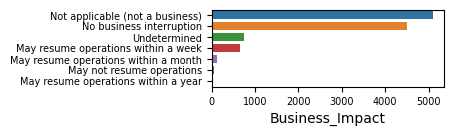

In [19]:
df_business_impact = fire_data['Business_Impact'].value_counts()

plt.figure(figsize = (3,1))
a = sns.barplot(x=df_business_impact,y= df_business_impact.index)
a.tick_params(labelsize=7)

plt.show()

In [20]:
df_business_impact

Not applicable (not a business)         5104
No business interruption                4491
Undetermined                             754
May resume operations within a week      642
May resume operations within a month     126
May not resume operations                 63
May resume operations within a year       34
Name: Business_Impact, dtype: int64

In [21]:
# tabela pokazujaca podzial ilosci ofiar >0 versus miejsce pozaru
pivot_business_impact = fire_data_cut.pivot_table(values='count' ,index='Business_Impact', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_business_impact = pivot_business_impact.sort_values('All',ascending=False)
pivot_business_impact.head(11)

Civilian_Casualties                     1    2   3   4  5  6  7  8  15  All
Business_Impact                                                            
All                                   770  112  40  19  2  4  1  2   1  951
Not applicable (not a business)       404   74  21  10  1  4  0  1   0  515
No business interruption              284   30  16   4  0  0  0  1   1  336
Undetermined                           46    3   2   3  1  0  0  0   0   55
May resume operations within a week    23    4   1   1  0  0  1  0   0   30
May not resume operations               7    0   0   0  0  0  0  0   0    7
May resume operations within a month    4    1   0   1  0  0  0  0   0    6
May resume operations within a year     2    0   0   0  0  0  0  0   0    2

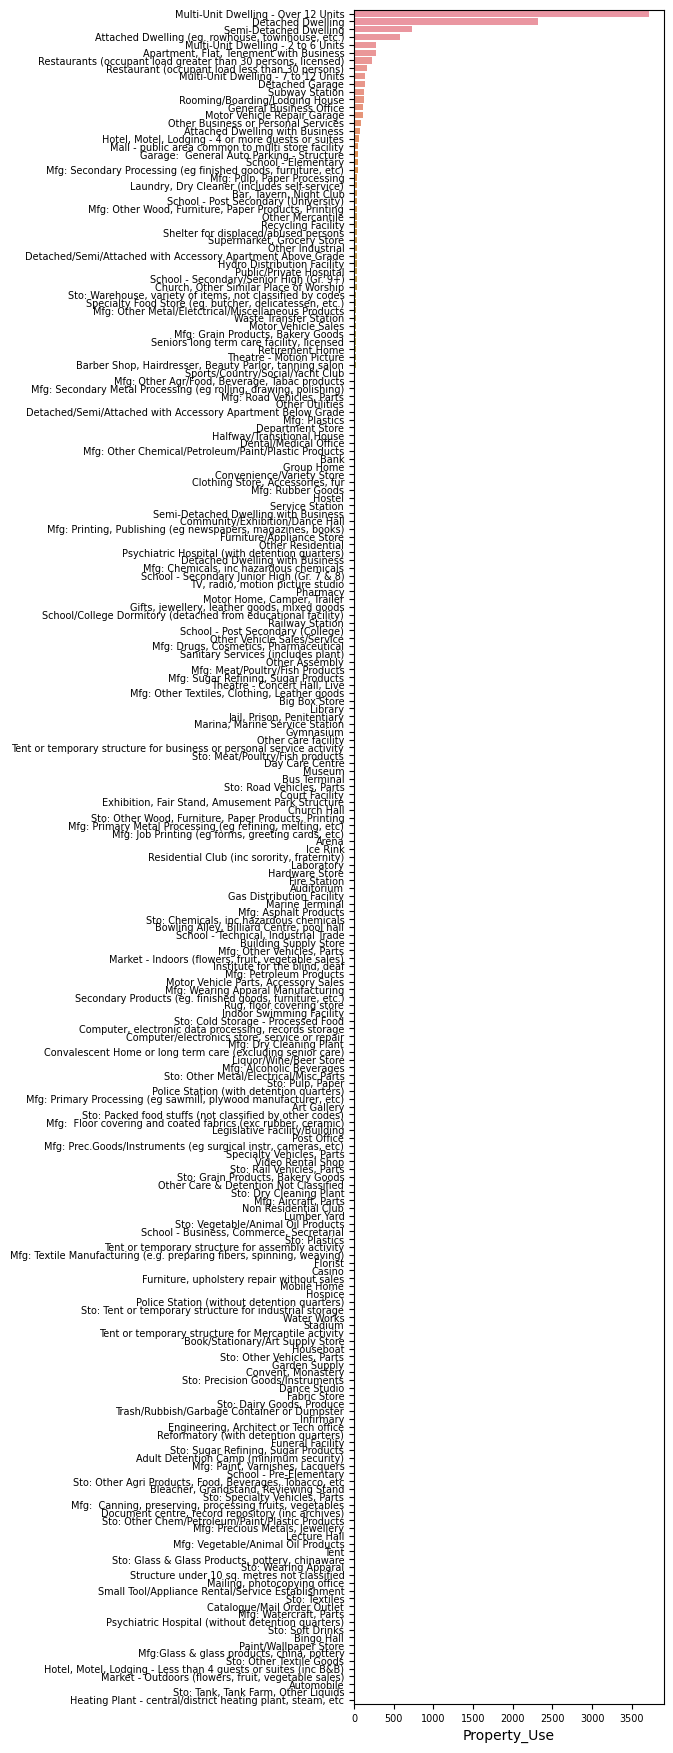

In [22]:
df_property_use = fire_data['Property_Use'].value_counts()

plt.figure(figsize = (4,22))
a = sns.barplot(x=df_property_use,y= df_property_use.index)
a.tick_params(labelsize=7)

plt.show()

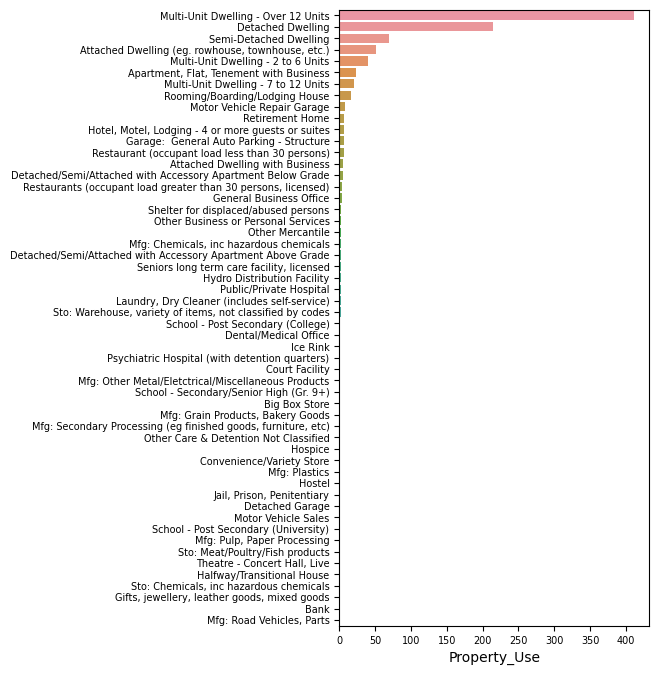

In [23]:
df_property_use = fire_data_cut['Property_Use'].value_counts()

plt.figure(figsize = (4,8))
a = sns.barplot(x=df_property_use,y= df_property_use.index)
a.tick_params(labelsize=7)

plt.show()

In [24]:
# tabela pokazujaca podzial ilosci ofiar >0 versus wlasnosc budynku
pivot_property = fire_data_cut.pivot_table(values='count' ,index='Property_Use', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_property = pivot_property.sort_values('All', ascending=False)
pivot_property.head(20)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Property_Use                                                                    
All                                                 770  112  40  19  2  4  1   
Multi-Unit Dwelling - Over 12 Units                 327   45  27   5  1  4  0   
Detached Dwelling                                   173   27   8   5  1  0  0   
Semi-Detached Dwelling                               56    9   1   4  0  0  0   
Attached Dwelling (eg. rowhouse, townhouse, etc.)    44    7   1   0  0  0  0   
Multi-Unit Dwelling - 2 to 6 Units                   34    5   0   1  0  0  0   
Apartment, Flat, Tenement with Business              20    3   1   0  0  0  0   
Multi-Unit Dwelling - 7 to 12 Units                  15    5   0   0  0  0  0   
Rooming/Boarding/Lodging House                       15    1   0   0  0  0  0   
Motor Vehicle Repair Garage                           7    0   1   0  0  0  0   
Retirement Home                                       6    0   0   0  0  0  1   
Restaurant (occupant load less than 30 persons)       6    0   0   0  0  0  0   
Garage:  General Auto Parking - Structure             6    0   0   0  0  0  0   
Hotel, Motel, Lodging - 4 or more guests or suites    4    2   0   0  0  0  0   
Attached Dwelling with Business                       4    1   0   0  0  0  0   
Detached/Semi/Attached with Accessory Apartment...    4    1   0   0  0  0  0   
General Business Office                               4    0   0   0  0  0  0   
Restaurants (occupant load greater than 30 pers...    3    0   0   1  0  0  0   
Other Mercantile                                      3    0   0   0  0  0  0   
Mfg: Chemicals, inc hazardous chemicals               3    0   0   0  0  0  0   

Civilian_Casualties                                 8  15  All  
Property_Use                                                    
All                                                 2   1  951  
Multi-Unit Dwelling - Over 12 Units                 2   1  412  
Detached Dwelling                                   0   0  214  
Semi-Detached Dwelling                              0   0   70  
Attached Dwelling (eg. rowhouse, townhouse, etc.)   0   0   52  
Multi-Unit Dwelling - 2 to 6 Units                  0   0   40  
Apartment, Flat, Tenement with Business             0   0   24  
Multi-Unit Dwelling - 7 to 12 Units                 0   0   20  
Rooming/Boarding/Lodging House                      0   0   16  
Motor Vehicle Repair Garage                         0   0    8  
Retirement Home                                     0   0    7  
Restaurant (occupant load less than 30 persons)     0   0    6  
Garage:  General Auto Parking - Structure           0   0    6  
Hotel, Motel, Lodging - 4 or more guests or suites  0   0    6  
Attached Dwelling with Business                     0   0    5  
Detached/Semi/Attached with Accessory Apartment...  0   0    5  
General Business Office                             0   0    4  
Restaurants (occupant load greater than 30 pers...  0   0    4  
Other Mercantile                                    0   0    3  
Mfg: Chemicals, inc hazardous chemicals             0   0    3

In [25]:
pivot_property_all = fire_data.pivot_table(values='count' ,index='Property_Use', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
#pivot_property_all.to_excel('/Users/user/Documents/InfoShareAcademy/23.04.24_Sprint_03_ML/Projekt_ML/dane/Fire_pivot_property_v1.xls')

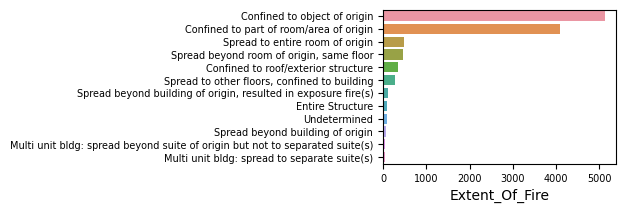

In [26]:
df_extend_fire = fire_data['Extent_Of_Fire'].value_counts()

plt.figure(figsize = (3,2))
a = sns.barplot(x=df_extend_fire,y= df_extend_fire.index)
a.tick_params(labelsize=7)

plt.show()

In [27]:
# tabela pokazujaca podzial ilosci ofiar >0 versus rozprzestrzenienie pozaru
pivot_extent = fire_data_cut.pivot_table(values='count', index='Extent_Of_Fire', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_extent = pivot_extent.sort_values('All', ascending=False)
pivot_extent.head(11)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Extent_Of_Fire                                                                  
All                                                 770  112  40  19  2  4  1   
Confined to part of room/area of origin             344   52  16   6  0  1  1   
Confined to object of origin                        219   15   7   1  0  0  0   
Spread to entire room of origin                      80   16   5   7  1  2  0   
Spread beyond room of origin, same floor             75   12   7   1  0  0  0   
Spread to other floors, confined to building         23   13   2   2  0  1  0   
Confined to roof/exterior structure                  10    0   0   1  0  0  0   
Spread beyond building of origin, resulted in e...    5    3   0   0  0  0  0   
Multi unit bldg: spread beyond suite of origin ...    6    0   1   0  0  0  0   
Multi unit bldg: spread to separate suite(s)          3    1   1   0  0  0  0   
Undetermined                                          3    0   0   1  1  0  0   

Civilian_Casualties                                 8  15  All  
Extent_Of_Fire                                                  
All                                                 2   1  951  
Confined to part of room/area of origin             1   0  421  
Confined to object of origin                        0   0  242  
Spread to entire room of origin                     0   0  111  
Spread beyond room of origin, same floor            1   1   97  
Spread to other floors, confined to building        0   0   41  
Confined to roof/exterior structure                 0   0   11  
Spread beyond building of origin, resulted in e...  0   0    8  
Multi unit bldg: spread beyond suite of origin ...  0   0    7  
Multi unit bldg: spread to separate suite(s)        0   0    5  
Undetermined                                        0   0    5

In [28]:
pivot_extent_all = fire_data.pivot_table(values='count', index='Extent_Of_Fire', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
#pivot_extent_all.to_excel('/Users/user/Documents/InfoShareAcademy/23.04.24_Sprint_03_ML/Projekt_ML/dane/Fire_extent_v1.xls')

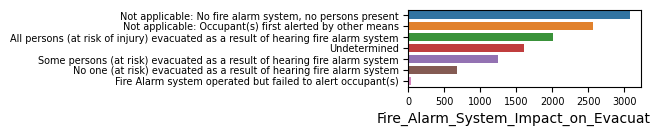

In [29]:
df_fire_system_evacuation = fire_data['Fire_Alarm_System_Impact_on_Evacuation'].value_counts()

plt.figure(figsize = (3,1))
a = sns.barplot(x=df_fire_system_evacuation,y= df_fire_system_evacuation.index)
a.tick_params(labelsize=7)

plt.show()

In [30]:
# tabela pokazujaca podzial ilosci ofiar >0 versus wplyw systemu alarmowego na ewakuacje
pivot_FI_evacuation = fire_data_cut.pivot_table(values='count' ,index='Fire_Alarm_System_Impact_on_Evacuation', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_FI_evacuation = pivot_FI_evacuation.sort_values('All',ascending=False)
pivot_FI_evacuation.head(11)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Fire_Alarm_System_Impact_on_Evacuation                                          
All                                                 770  112  40  19  2  4  1   
Not applicable: No fire alarm system, no person...  204   23   3   4  0  0  0   
All persons (at risk of injury) evacuated as a ...  147   27  13   2  0  1  1   
Some persons (at risk) evacuated as a result of...  136   23  15   3  0  2  0   
Not applicable: Occupant(s) first alerted by ot...  142   23   6   6  0  1  0   
Undetermined                                        100   11   1   4  2  0  0   
No one (at risk) evacuated as a result of heari...   33    5   2   0  0  0  0   
Fire Alarm system operated but failed to alert ...    8    0   0   0  0  0  0   

Civilian_Casualties                                 8  15  All  
Fire_Alarm_System_Impact_on_Evacuation                          
All                                                 2   1  951  
Not applicable: No fire alarm system, no person...  1   0  235  
All persons (at risk of injury) evacuated as a ...  0   1  192  
Some persons (at risk) evacuated as a result of...  1   0  180  
Not applicable: Occupant(s) first alerted by ot...  0   0  178  
Undetermined                                        0   0  118  
No one (at risk) evacuated as a result of heari...  0   0   40  
Fire Alarm system operated but failed to alert ...  0   0    8

In [31]:
pivot_FA_evacuation_all = fire_data.pivot_table(values='count' ,index='Fire_Alarm_System_Impact_on_Evacuation', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
#pivot_FA_evacuation_all.to_excel('/Users/user/Documents/InfoShareAcademy/23.04.24_Sprint_03_ML/Projekt_ML/dane/Fire_FA_evacuation_v1.xls')

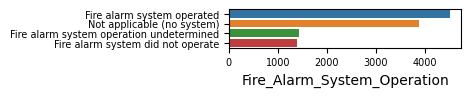

In [32]:
df_fire_system_operation = fire_data['Fire_Alarm_System_Operation'].value_counts()

plt.figure(figsize = (3,0.5))
a = sns.barplot(x=df_fire_system_operation,y= df_fire_system_operation.index)
a.tick_params(labelsize=7)

plt.show()

In [33]:
# tabela pokazujaca podzial ilosci ofiar >0 versus wplyw działania systemu alarmowego
pivot_FI_operation = fire_data_cut.pivot_table(values='count' ,index='Fire_Alarm_System_Operation', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_FI_operation = pivot_FI_operation.sort_values('All',ascending=False)
pivot_FI_operation.head(11)

Civilian_Casualties                         1    2   3   4  5  6  7  8  15  \
Fire_Alarm_System_Operation                                                  
All                                       770  112  40  19  2  4  1  2   1   
Fire alarm system operated                342   56  29   7  1  3  1  1   1   
Not applicable (no system)                276   38   9   8  1  0  0  1   0   
Fire alarm system did not operate          85   10   2   2  0  1  0  0   0   
Fire alarm system operation undetermined   67    8   0   2  0  0  0  0   0   

Civilian_Casualties                       All  
Fire_Alarm_System_Operation                    
All                                       951  
Fire alarm system operated                441  
Not applicable (no system)                333  
Fire alarm system did not operate         100  
Fire alarm system operation undetermined   77

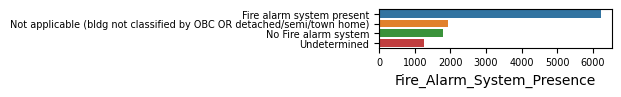

In [34]:
df_fire_system_presence = fire_data['Fire_Alarm_System_Presence'].value_counts()

plt.figure(figsize = (3,0.5))
a = sns.barplot(x=df_fire_system_presence,y= df_fire_system_presence.index)
a.tick_params(labelsize=7)

plt.show()

In [35]:
# tabela pokazujaca podzial ilosci ofiar >0 versus wplyw obecnosci systemu alarmowego
pivot_FI_presence = fire_data_cut.pivot_table(values='count' ,index='Fire_Alarm_System_Presence', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_FI_presence = pivot_FI_presence.sort_values('All',ascending=False)
pivot_FI_presence.head(11)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Fire_Alarm_System_Presence                                                      
All                                                 770  112  40  19  2  4  1   
Fire alarm system present                           448   67  31   9  1  4  1   
Not applicable (bldg not classified by OBC OR d...  140   16   5   2  1  0  0   
No Fire alarm system                                128   22   3   5  0  0  0   
Undetermined                                         54    7   1   3  0  0  0   

Civilian_Casualties                                 8  15  All  
Fire_Alarm_System_Presence                                      
All                                                 2   1  951  
Fire alarm system present                           1   1  563  
Not applicable (bldg not classified by OBC OR d...  0   0  164  
No Fire alarm system                                1   0  159  
Undetermined                                        0   0   65

In [36]:
pivot_FA_presence_all = fire_data.pivot_table(values='count' ,index='Fire_Alarm_System_Presence', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
#pivot_FA_presence_all.to_excel('/Users/user/Documents/InfoShareAcademy/23.04.24_Sprint_03_ML/Projekt_ML/dane/Fire_FA_presence_v1.xls')

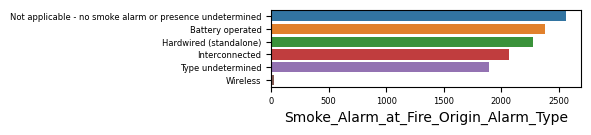

In [37]:
df_fire_alarm_type = fire_data['Smoke_Alarm_at_Fire_Origin_Alarm_Type'].value_counts()

plt.figure(figsize = (4,1))
a = sns.barplot(x=df_fire_alarm_type,y= df_fire_alarm_type.index)
a.tick_params(labelsize=6)

plt.show()

In [38]:
# tabela pokazujaca podzial ilosci ofiar >0 versus wplyw rodzaju systemu alarmowego
pivot_FI_type = fire_data_cut.pivot_table(values='count' ,index='Smoke_Alarm_at_Fire_Origin_Alarm_Type', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_FI_type = pivot_FI_type.sort_values('All',ascending=False)
pivot_FI_type.head(11)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Smoke_Alarm_at_Fire_Origin_Alarm_Type                                           
All                                                 770  112  40  19  2  4  1   
Battery operated                                    231   38  16   3  0  1  0   
Hardwired (standalone)                              157   16   8   2  0  0  1   
Type undetermined                                   133   24   6   5  2  1  0   
Interconnected                                      127   16   7   3  0  0  0   
Not applicable - no smoke alarm or presence und...  121   17   3   6  0  2  0   
Wireless                                              1    1   0   0  0  0  0   

Civilian_Casualties                                 8  15  All  
Smoke_Alarm_at_Fire_Origin_Alarm_Type                           
All                                                 2   1  951  
Battery operated                                    1   0  290  
Hardwired (standalone)                              0   0  184  
Type undetermined                                   0   0  171  
Interconnected                                      1   1  155  
Not applicable - no smoke alarm or presence und...  0   0  149  
Wireless                                            0   0    2

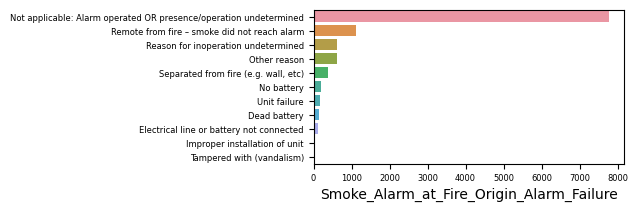

In [39]:
df_fire_larm_fail = fire_data['Smoke_Alarm_at_Fire_Origin_Alarm_Failure'].value_counts()

plt.figure(figsize = (4,2))
a = sns.barplot(x=df_fire_larm_fail,y= df_fire_larm_fail.index)
a.tick_params(labelsize=6)

plt.show()

In [40]:
# tabela pokazujaca podzial ilosci ofiar >0 versus wplyw awarii systemu alarmowego
pivot_FI_failure = fire_data_cut.pivot_table(values='count' ,index='Smoke_Alarm_at_Fire_Origin_Alarm_Failure', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_FI_failure = pivot_FI_failure.sort_values('All',ascending=False)
pivot_FI_failure.head(11)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Smoke_Alarm_at_Fire_Origin_Alarm_Failure                                        
All                                                 770  112  40  19  2  4  1   
Not applicable: Alarm operated OR presence/oper...  554   76  27   9  1  3  1   
Reason for inoperation undetermined                  52   11   3   5  0  1  0   
Other reason                                         37    9   2   3  0  0  0   
Remote from fire – smoke did not reach alarm         36    4   0   0  1  0  0   
No battery                                           21    3   1   0  0  0  0   
Unit failure                                         16    4   3   0  0  0  0   
Dead battery                                         17    2   1   0  0  0  0   
Electrical line or battery not connected             16    1   0   1  0  0  0   
Separated from fire (e.g. wall, etc)                 10    0   0   0  0  0  0   
Tampered with (vandalism)                             5    2   1   1  0  0  0   

Civilian_Casualties                                 8  15  All  
Smoke_Alarm_at_Fire_Origin_Alarm_Failure                        
All                                                 2   1  951  
Not applicable: Alarm operated OR presence/oper...  1   1  673  
Reason for inoperation undetermined                 1   0   73  
Other reason                                        0   0   51  
Remote from fire – smoke did not reach alarm        0   0   41  
No battery                                          0   0   25  
Unit failure                                        0   0   23  
Dead battery                                        0   0   20  
Electrical line or battery not connected            0   0   18  
Separated from fire (e.g. wall, etc)                0   0   10  
Tampered with (vandalism)                           0   0    9

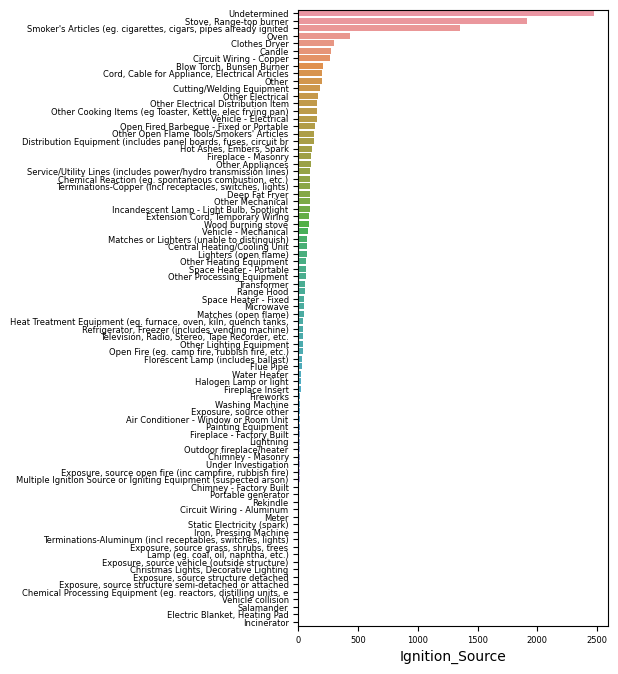

In [41]:
df_fire_source = fire_data['Ignition_Source'].value_counts()

plt.figure(figsize = (4,8))
a = sns.barplot(x=df_fire_source,y= df_fire_source.index)
a.tick_params(labelsize=6)

plt.show()

In [42]:
# tabela pokazujaca podzial ilosci ofiar >0 versus wplyw zrodla pozaru
pivot_ign_source = fire_data_cut.pivot_table(values='count' ,index='Ignition_Source', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_ign_source = pivot_ign_source.sort_values('All',ascending=False)
pivot_ign_source.head(11)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Ignition_Source                                                                 
All                                                 770  112  40  19  2  4  1   
Stove, Range-top burner                             255   34   5   4  0  0  0   
Undetermined                                        143   28  10   3  2  2  0   
Smoker's Articles (eg. cigarettes, cigars, pipe...   99   11   4   2  0  2  0   
Candle                                               37    7   2   0  0  0  0   
Oven                                                 31    3   3   0  0  0  0   
Cord, Cable for Appliance, Electrical Articles       20    1   0   0  0  0  0   
Other Cooking Items (eg Toaster, Kettle, elec f...   16    3   1   0  0  0  0   
Other Appliances                                     11    3   0   0  0  0  0   
Clothes Dryer                                        13    0   0   0  0  0  0   
Blow Torch, Bunsen Burner                             5    4   2   0  0  0  0   

Civilian_Casualties                                 8  15  All  
Ignition_Source                                                 
All                                                 2   1  951  
Stove, Range-top burner                             1   0  299  
Undetermined                                        0   1  189  
Smoker's Articles (eg. cigarettes, cigars, pipe...  0   0  118  
Candle                                              0   0   46  
Oven                                                0   0   37  
Cord, Cable for Appliance, Electrical Articles      0   0   21  
Other Cooking Items (eg Toaster, Kettle, elec f...  0   0   20  
Other Appliances                                    0   0   14  
Clothes Dryer                                       0   0   13  
Blow Torch, Bunsen Burner                           0   0   11

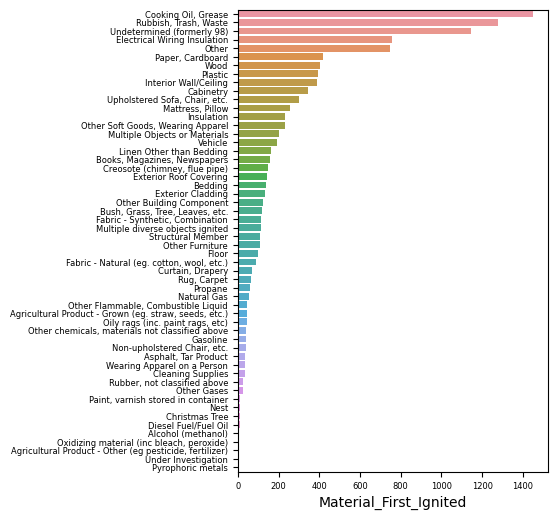

In [43]:
df_fire_mat = fire_data['Material_First_Ignited'].value_counts()

plt.figure(figsize = (4,6))
a = sns.barplot(x=df_fire_mat,y= df_fire_mat.index)
a.tick_params(labelsize=6)

plt.show()

In [44]:
# tabela pokazujaca podzial ilosci ofiar >0 versus wplyw materialu zapalnego
pivot_material = fire_data_cut.pivot_table(values='count' ,index='Material_First_Ignited', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_material = pivot_material.sort_values('All',ascending=False)
pivot_material.head(11)

Civilian_Casualties              1    2   3   4  5  6  7  8  15  All
Material_First_Ignited                                              
All                            770  112  40  19  2  4  1  2   1  951
Cooking Oil, Grease            188   28   6   4  0  0  0  1   0  227
Undetermined (formerly 98)     106   21   4   4  1  1  0  0   0  137
Cabinetry                       40    7   4   0  0  0  0  0   0   51
Upholstered Sofa, Chair, etc.   36    9   1   2  0  2  0  0   1   51
Mattress, Pillow                39    7   4   1  0  0  0  0   0   51
Other                           39    7   1   0  0  0  0  0   0   47
Bedding                         31    8   1   1  0  0  0  1   0   42
Electrical Wiring Insulation    29    4   4   2  0  0  0  0   0   39
Rubbish, Trash, Waste           24    1   1   0  0  0  0  0   0   26
Plastic                         20    2   1   1  0  0  1  0   0   25

In [45]:
pivot_material_all = fire_data.pivot_table(values='count' ,index='Material_First_Ignited', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
#pivot_material_all.to_excel('/Users/user/Documents/InfoShareAcademy/23.04.24_Sprint_03_ML/Projekt_ML/dane/Fire_pivot_material_v1.xls')

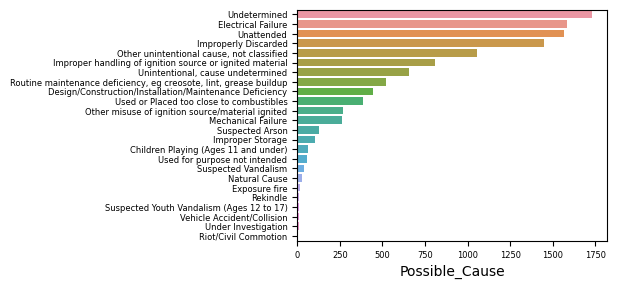

In [46]:
df_fire_couse = fire_data['Possible_Cause'].value_counts()

plt.figure(figsize = (4,3))
a = sns.barplot(x=df_fire_couse,y= df_fire_couse.index)
a.tick_params(labelsize=6)

plt.show()

In [47]:
# tabela pokazujaca podzial ilosci ofiar >0 versus przyczyna pozaru
pivot_cause = fire_data_cut.pivot_table(values='count' ,index='Possible_Cause', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_cause = pivot_cause.sort_values('All',ascending=False)
pivot_cause.head(11)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Possible_Cause                                                                  
All                                                 770  112  40  19  2  4  1   
Unattended                                          199   33   6   4  0  0  0   
Undetermined                                        109   19   6   6  2  2  0   
Improper handling of ignition source or ignited...   91   11   4   2  0  0  0   
Electrical Failure                                   75    7   6   3  0  0  1   
Other unintentional cause, not classified            64   13   4   1  0  0  0   
Improperly Discarded                                 63    5   4   0  0  2  0   
Unintentional, cause undetermined                    55    9   4   0  0  0  0   
Used or Placed too close to combustibles             34    6   3   1  0  0  0   
Other misuse of ignition source/material ignited     34    6   0   0  0  0  0   
Design/Construction/Installation/Maintenance De...   10    0   3   1  0  0  0   

Civilian_Casualties                                 8  15  All  
Possible_Cause                                                  
All                                                 2   1  951  
Unattended                                          1   0  243  
Undetermined                                        0   1  145  
Improper handling of ignition source or ignited...  0   0  108  
Electrical Failure                                  0   0   92  
Other unintentional cause, not classified           0   0   82  
Improperly Discarded                                0   0   74  
Unintentional, cause undetermined                   0   0   68  
Used or Placed too close to combustibles            0   0   44  
Other misuse of ignition source/material ignited    0   0   40  
Design/Construction/Installation/Maintenance De...  0   0   14

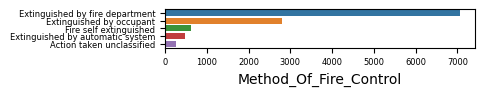

In [48]:
df_fire_control = fire_data['Method_Of_Fire_Control'].value_counts()

plt.figure(figsize = (4,0.5))
a = sns.barplot(x=df_fire_control,y= df_fire_control.index)
a.tick_params(labelsize=6)

In [49]:
# tabela pokazujaca podzial ilosci ofiar >0 versus sposób ugaszenia pozaru
pivot_control = fire_data_cut.pivot_table(values='count' ,index='Method_Of_Fire_Control', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_control = pivot_control.sort_values('All',ascending=False)
pivot_control.head(11)

Civilian_Casualties                 1    2   3   4  5  6  7  8  15  All
Method_Of_Fire_Control                                                 
All                               770  112  40  19  2  4  1  2   1  951
Extinguished by fire department   438   75  29  14  2  4  0  2   1  565
Extinguished by occupant          252   30   9   3  0  0  1  0   0  295
Fire self extinguished             46    3   2   1  0  0  0  0   0   52
Action taken unclassified          18    3   0   1  0  0  0  0   0   22
Extinguished by automatic system   16    1   0   0  0  0  0  0   0   17

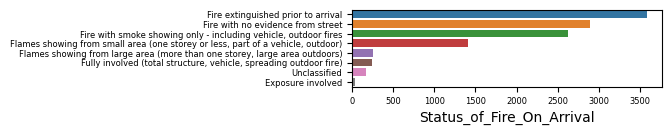

In [50]:
df_fire_status = fire_data['Status_of_Fire_On_Arrival'].value_counts()

plt.figure(figsize = (4,1))
a = sns.barplot(x=df_fire_status,y= df_fire_status.index)
a.tick_params(labelsize=6)

plt.show()

In [51]:
# tabela pokazujaca podzial ilosci ofiar >0 versus stan pozaru po przyjezdzie strazy
pivot_status = fire_data_cut.pivot_table(values='count' ,index='Status_of_Fire_On_Arrival', columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_status = pivot_status.sort_values('All',ascending=False)
pivot_status.head(11)

Civilian_Casualties                                   1    2   3   4  5  6  7  \
Status_of_Fire_On_Arrival                                                       
All                                                 770  112  40  19  2  4  1   
Fire extinguished prior to arrival                  285   33  10   4  0  0  1   
Fire with no evidence from street                   188   36  10   0  0  0  0   
Fire with smoke showing only - including vehicl...  166   28   9  10  0  1  0   
Flames showing from small area (one storey or l...   90   10   8   4  1  3  0   
Flames showing from large area (more than one s...   17    3   1   0  0  0  0   
Unclassified                                         14    1   0   0  0  0  0   
Fully involved (total structure, vehicle, sprea...    9    1   2   1  1  0  0   
Exposure involved                                     1    0   0   0  0  0  0   

Civilian_Casualties                                 8  15  All  
Status_of_Fire_On_Arrival                                       
All                                                 2   1  951  
Fire extinguished prior to arrival                  0   0  333  
Fire with no evidence from street                   2   0  236  
Fire with smoke showing only - including vehicl...  0   1  215  
Flames showing from small area (one storey or l...  0   0  116  
Flames showing from large area (more than one s...  0   0   21  
Unclassified                                        0   0   15  
Fully involved (total structure, vehicle, sprea...  0   0   14  
Exposure involved                                   0   0    1

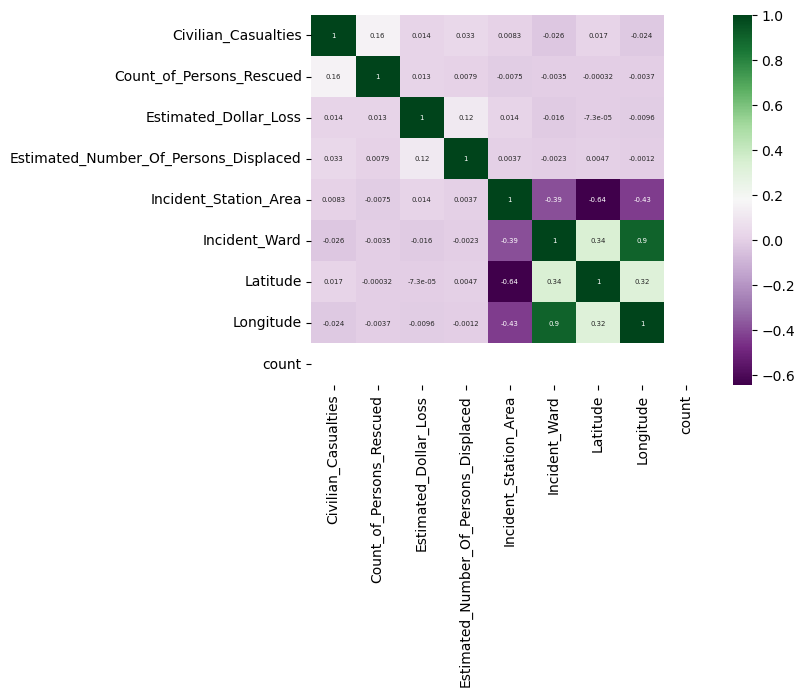

In [52]:
sns.heatmap(fire_data.corr(), cmap="PRGn", annot = True, annot_kws={'size':5})
plt.show()

In [53]:
fire_data.columns

Index(['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties',
       'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss',
       'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Station_Area',
       'Incident_Ward', 'Last_TFS_Unit_Clear_Time', 'Latitude', 'Longitude',
       'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival',
       'TFS_Alarm_Time', 'TFS_Arrival_Time', 'count'],
      dtype='object')

In [54]:
fire_alarm_data = fire_data[['Civilian_Casualties', 'Fire_Alarm_System_Presence','Smoke_Alarm_at_Fire_Origin_Alarm_Type',
                             'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation',  
                             'Smoke_Alarm_at_Fire_Origin_Alarm_Failure','count']]
fire_alarm_data = fire_alarm_data.sort_values('Civilian_Casualties')

In [55]:
pivot_Fire_Alarms4 = fire_data_cut.pivot_table(values='count' ,index=['Fire_Alarm_System_Presence','Smoke_Alarm_at_Fire_Origin_Alarm_Type',
                                                                      'Fire_Alarm_System_Operation',
                                                                      'Smoke_Alarm_at_Fire_Origin_Alarm_Failure'], 
                                                                      columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_Fire_Alarms4 = pivot_Fire_Alarms4.sort_values('All',ascending=False)
pivot_Fire_Alarms4.head(20)

Civilian_Casualties                                                                                                                                                                                  1  \
Fire_Alarm_System_Presence                         Smoke_Alarm_at_Fire_Origin_Alarm_Type              Fire_Alarm_System_Operation              Smoke_Alarm_at_Fire_Origin_Alarm_Failure                  
All                                                                                                                                                                                                770   
Fire alarm system present                          Interconnected                                     Fire alarm system operated               Not applicable: Alarm operated OR presence/oper...  101   
                                                   Hardwired (standalone)                             Fire alarm system operated               Not applicable: Alarm operated OR presence/oper...   86   
                                                   Battery operated                                   Fire alarm system operated               Not applicable: Alarm operated OR presence/oper...   46   
Not applicable (bldg not classified by OBC OR d... Battery operated                                   Not applicable (no system)               Not applicable: Alarm operated OR presence/oper...   48   
Fire alarm system present                          Type undetermined                                  Fire alarm system operated               Not applicable: Alarm operated OR presence/oper...   42   
No Fire alarm system                               Battery operated                                   Not applicable (no system)               Not applicable: Alarm operated OR presence/oper...   33   
                                                   Not applicable - no smoke alarm or presence und... Not applicable (no system)               Not applicable: Alarm operated OR presence/oper...   28   
Not applicable (bldg not classified by OBC OR d... Not applicable - no smoke alarm or presence und... Not applicable (no system)               Not applicable: Alarm operated OR presence/oper...   22   
                                                   Type undetermined                                  Not applicable (no system)               Not applicable: Alarm operated OR presence/oper...   17   
Fire alarm system present                          Not applicable - no smoke alarm or presence und... Fire alarm system operated               Not applicable: Alarm operated OR presence/oper...   13   
Undetermined                                       Type undetermined                                  Fire alarm system operation undetermined Not applicable: Alarm operated OR presence/oper...   14   
Fire alarm system present                          Battery operated                                   Fire alarm system did not operate        Not applicable: Alarm operated OR presence/oper...   12   
Undetermined                                       Not applicable - no smoke alarm or presence und... Fire alarm system operation undetermined Not applicable: Alarm operated OR presence/oper...   10   
Fire alarm system present                          Type undetermined                                  Fire alarm system operated               Reason for inoperation undetermined                   7   
                                                   Hardwired (standalone)                             Fire alarm system operation undetermined Not applicable: Alarm operated OR presence/oper...   10   
No Fire alarm system                               Battery operated                                   Not applicable (no system)               No battery                                           10   
Not applicable (bldg not classified by OBC OR d... Hardwired (standalone)                             Not applicable (no system)               Not applicable: Ala

In [56]:
fire_alarm_data[(fire_alarm_data['Fire_Alarm_System_Presence'] == "No Fire alarm system") & (fire_alarm_data['Smoke_Alarm_at_Fire_Origin_Alarm_Type'] =='Battery operated')]

Civilian_Casualties Fire_Alarm_System_Presence  \
7335                    0       No Fire alarm system   
7311                    0       No Fire alarm system   
7320                    0       No Fire alarm system   
7387                    0       No Fire alarm system   
7204                    0       No Fire alarm system   
...                   ...                        ...   
5858                    2       No Fire alarm system   
45                      3       No Fire alarm system   
8757                    3       No Fire alarm system   
317                     4       No Fire alarm system   
7                       8       No Fire alarm system   

     Smoke_Alarm_at_Fire_Origin_Alarm_Type  \
7335                      Battery operated   
7311                      Battery operated   
7320                      Battery operated   
7387                      Battery operated   
7204                      Battery operated   
...                                    ...   
5858                      Battery operated   
45                        Battery operated   
8757                      Battery operated   
317                       Battery operated   
7                         Battery operated   

                 Fire_Alarm_System_Impact_on_Evacuation  \
7335  Not applicable: No fire alarm system, no perso...   
7311  Not applicable: No fire alarm system, no perso...   
7320  Not applicable: No fire alarm system, no perso...   
7387  Not applicable: No fire alarm system, no perso...   
7204                                       Undetermined   
...                                                 ...   
5858  Not applicable: No fire alarm system, no perso...   
45    Some persons (at risk) evacuated as a result o...   
8757                                       Undetermined   
317   Not applicable: No fire alarm system, no perso...   
7     Not applicable: No fire alarm system, no perso...   

     Fire_Alarm_System_Operation  \
7335  Not applicable (no system)   
7311  Not applicable (no system)   
7320  Not applicable (no system)   
7387  Not applicable (no system)   
7204  Not applicable (no system)   
...                          ...   
5858  Not applicable (no system)   
45    Not applicable (no system)   
8757  Not applicable (no system)   
317   Not applicable (no system)   
7     Not applicable (no system)   

               Smoke_Alarm_at_Fire_Origin_Alarm_Failure  count  
7335  Not applicable: Alarm operated OR presence/ope...      1  
7311  Not applicable: Alarm operated OR presence/ope...      1  
7320       Remote from fire – smoke did not reach alarm      1  
7387  Not applicable: Alarm operated OR presence/ope...      1  
7204  Not applicable: Alarm operated OR presence/ope...      1  
...                                                 ...    ...  
5858  Not applicable: Alarm operated OR presence/ope...      1  
45    Not applicable: Alarm operated OR presence/ope...      1  
8757                                       Unit failure      1  
317   Not applicable: Alarm operated OR presence/ope...      1  
7                   Reason for inoperation undetermined      1  

[648 rows x 7 columns]

In [57]:
pivot_Fire_Alarms = fire_data_cut.pivot_table(values='count' ,index=['Fire_Alarm_System_Presence','Smoke_Alarm_at_Fire_Origin_Alarm_Type'], columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_Fire_Alarms = pivot_Fire_Alarms.sort_values('All',ascending=False)
pivot_Fire_Alarms.head(15)

Civilian_Casualties                                                                                      1  \
Fire_Alarm_System_Presence                         Smoke_Alarm_at_Fire_Origin_Alarm_Type                     
All                                                                                                    770   
Fire alarm system present                          Hardwired (standalone)                              134   
                                                   Interconnected                                      116   
                                                   Battery operated                                     99   
                                                   Type undetermined                                    69   
Not applicable (bldg not classified by OBC OR d... Battery operated                                     65   
No Fire alarm system                               Battery operated                                     61   
                                                   Not applicable - no smoke alarm or presence und...   44   
Fire alarm system present                          Not applicable - no smoke alarm or presence und...   29   
Not applicable (bldg not classified by OBC OR d... Not applicable - no smoke alarm or presence und...   29   
                                                   Type undetermined                                    26   
Undetermined                                       Type undetermined                                    24   
                                                   Not applicable - no smoke alarm or presence und...   19   
No Fire alarm system                               Type undetermined                                    14   
Not applicable (bldg not classified by OBC OR d... Hardwired (standalone)                               13   

Civilian_Casualties                                                                                      2  \
Fire_Alarm_System_Presence                         Smoke_Alarm_at_Fire_Origin_Alarm_Type                     
All                                                                                                    112   
Fire alarm system present                          Hardwired (standalone)                               14   
                                                   Interconnected                                       16   
                                                   Battery operated                                     18   
                                                   Type undetermined                                    13   
Not applicable (bldg not classified by OBC OR d... Battery operated                                      8   
No Fire alarm system                               Battery operated                                     10   
                                                   Not applicable - no smoke alarm or presence und...    6   
Fire alarm system present                          Not applicable - no smoke alarm or presence und...    5   
Not applicable (bldg not classified by OBC OR d... Not applicable - no smoke alarm or presence und...    4   
                                                   Type undetermined                                     3   
Undetermined                                       Type undetermined                                     3   
                                                   Not applicable - no smoke alarm or presence und...    2   
No Fire alarm system                               Type undetermined                                     5   
Not applicable (bldg not classified by OBC OR d... Hardwired (standalone)                                1   

Civilian_Casualties                                                                                     3  \
Fire_Alarm_System_Presence                         Smoke_Alarm_at_Fire_Origin_Alarm_Type                    
All                                     

In [58]:
pivot_Fire_Alarms2 = fire_data_cut.pivot_table(values='count' ,index=['Fire_Alarm_System_Presence','Smoke_Alarm_at_Fire_Origin_Alarm_Failure'], columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_Fire_Alarms2 = pivot_Fire_Alarms2.sort_values('All',ascending=False)
pivot_Fire_Alarms2.head(15)

Civilian_Casualties                                                                                      1  \
Fire_Alarm_System_Presence                         Smoke_Alarm_at_Fire_Origin_Alarm_Failure                  
All                                                                                                    770   
Fire alarm system present                          Not applicable: Alarm operated OR presence/oper...  335   
Not applicable (bldg not classified by OBC OR d... Not applicable: Alarm operated OR presence/oper...  104   
No Fire alarm system                               Not applicable: Alarm operated OR presence/oper...   76   
Undetermined                                       Not applicable: Alarm operated OR presence/oper...   39   
Fire alarm system present                          Reason for inoperation undetermined                  26   
                                                   Remote from fire – smoke did not reach alarm         28   
                                                   Other reason                                         17   
No Fire alarm system                               Other reason                                         13   
                                                   Reason for inoperation undetermined                  14   
Fire alarm system present                          Electrical line or battery not connected             13   
                                                   Unit failure                                          8   
No Fire alarm system                               No battery                                           11   
Not applicable (bldg not classified by OBC OR d... Remote from fire – smoke did not reach alarm          8   
Fire alarm system present                          No battery                                            6   

Civilian_Casualties                                                                                      2  \
Fire_Alarm_System_Presence                         Smoke_Alarm_at_Fire_Origin_Alarm_Failure                  
All                                                                                                    112   
Fire alarm system present                          Not applicable: Alarm operated OR presence/oper...   52   
Not applicable (bldg not classified by OBC OR d... Not applicable: Alarm operated OR presence/oper...    8   
No Fire alarm system                               Not applicable: Alarm operated OR presence/oper...   11   
Undetermined                                       Not applicable: Alarm operated OR presence/oper...    5   
Fire alarm system present                          Reason for inoperation undetermined                   5   
                                                   Remote from fire – smoke did not reach alarm          3   
                                                   Other reason                                          1   
No Fire alarm system                               Other reason                                          4   
                                                   Reason for inoperation undetermined                   3   
Fire alarm system present                          Electrical line or battery not connected              1   
                                                   Unit failure                                          1   
No Fire alarm system                               No battery                                            0   
Not applicable (bldg not classified by OBC OR d... Remote from fire – smoke did not reach alarm          1   
Fire alarm system present                          No battery                                            3   

Civilian_Casualties                                                                                     3  \
Fire_Alarm_System_Presence                         Smoke_Alarm_at_Fire_Origin_Alarm_Failure                 
All                                     

In [59]:
pivot_Fire_Alarms3 = fire_data_cut.pivot_table(values='count' ,index=['Fire_Alarm_System_Presence','Fire_Alarm_System_Impact_on_Evacuation'], columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_Fire_Alarms3 = pivot_Fire_Alarms3.sort_values('All',ascending=False)
pivot_Fire_Alarms3.head(15)

Civilian_Casualties                                                                                      1  \
Fire_Alarm_System_Presence                         Fire_Alarm_System_Impact_on_Evacuation                    
All                                                                                                    770   
Fire alarm system present                          All persons (at risk of injury) evacuated as a ...  139   
                                                   Some persons (at risk) evacuated as a result of...  132   
Not applicable (bldg not classified by OBC OR d... Not applicable: No fire alarm system, no person...  108   
No Fire alarm system                               Not applicable: No fire alarm system, no person...   89   
Fire alarm system present                          Not applicable: Occupant(s) first alerted by ot...   78   
                                                   Undetermined                                         59   
Undetermined                                       Undetermined                                         30   
Fire alarm system present                          No one (at risk) evacuated as a result of heari...   29   
No Fire alarm system                               Not applicable: Occupant(s) first alerted by ot...   23   
Not applicable (bldg not classified by OBC OR d... Not applicable: Occupant(s) first alerted by ot...   25   
Undetermined                                       Not applicable: Occupant(s) first alerted by ot...   16   
No Fire alarm system                               Undetermined                                          7   
Fire alarm system present                          Fire Alarm system operated but failed to alert ...    8   
Not applicable (bldg not classified by OBC OR d... Undetermined                                          4   

Civilian_Casualties                                                                                      2  \
Fire_Alarm_System_Presence                         Fire_Alarm_System_Impact_on_Evacuation                    
All                                                                                                    112   
Fire alarm system present                          All persons (at risk of injury) evacuated as a ...   26   
                                                   Some persons (at risk) evacuated as a result of...   22   
Not applicable (bldg not classified by OBC OR d... Not applicable: No fire alarm system, no person...    9   
No Fire alarm system                               Not applicable: No fire alarm system, no person...   11   
Fire alarm system present                          Not applicable: Occupant(s) first alerted by ot...   10   
                                                   Undetermined                                          3   
Undetermined                                       Undetermined                                          5   
Fire alarm system present                          No one (at risk) evacuated as a result of heari...    4   
No Fire alarm system                               Not applicable: Occupant(s) first alerted by ot...    9   
Not applicable (bldg not classified by OBC OR d... Not applicable: Occupant(s) first alerted by ot...    4   
Undetermined                                       Not applicable: Occupant(s) first alerted by ot...    0   
No Fire alarm system                               Undetermined                                          1   
Fire alarm system present                          Fire Alarm system operated but failed to alert ...    0   
Not applicable (bldg not classified by OBC OR d... Undetermined                                          2   

Civilian_Casualties                                                                                     3  \
Fire_Alarm_System_Presence                         Fire_Alarm_System_Impact_on_Evacuation                   
All                                     

In [60]:
fire_source_data = fire_data[['Civilian_Casualties','Area_of_Origin' ,'Ignition_Source','Material_First_Ignited', 'Possible_Cause','count']]
fire_source_data = fire_source_data.sort_values('Civilian_Casualties')

In [61]:
pivot_Fire_source = fire_data_cut.pivot_table(values='count' ,index=['Area_of_Origin','Material_First_Ignited','Ignition_Source','Possible_Cause'], columns='Civilian_Casualties',fill_value=0,margins=True,aggfunc=np.sum)
pivot_Fire_source = pivot_Fire_source.sort_values('All',ascending=False)
pivot_Fire_source.head(25)

Civilian_Casualties                                                                                                                                                                       1  \
Area_of_Origin                                     Material_First_Ignited        Ignition_Source                                    Possible_Cause                                            
All                                                                                                                                                                                     770   
Cooking Area or Kitchen                            Cooking Oil, Grease           Stove, Range-top burner                            Unattended                                          115   
                                                                                                                                    Other unintentional cause, not classified            20   
                                                   Cabinetry                     Stove, Range-top burner                            Unattended                                           19   
Sleeping Area or Bedroom (inc. patients room, d... Undetermined (formerly 98)    Undetermined                                       Undetermined                                         13   
Cooking Area or Kitchen                            Cooking Oil, Grease           Stove, Range-top burner                            Improper handling of ignition source or ignited...   14   
Undetermined  (formerly 98)                        Undetermined (formerly 98)    Undetermined                                       Undetermined                                         10   
Living Area (e.g. living, TV, recreation, etc)     Undetermined (formerly 98)    Undetermined                                       Undetermined                                         10   
                                                   Upholstered Sofa, Chair, etc. Smoker's Articles (eg. cigarettes, cigars, pipe... Improperly Discarded                                  9   
Cooking Area or Kitchen                            Other                         Stove, Range-top burner                            Unattended                                           10   
                                                   Undetermined (formerly 98)    Undetermined                                       Undetermined                                          8   
                                                   Cooking Oil, Grease           Stove, Range-top burner                            Unintentional, cause undetermined                     9   
                                                                                 Oven                                               Unattended                                            7   
Sleeping Area or Bedroom (inc. patients room, d... Mattress, Pillow              Undetermined                                       Undetermined                                          5   
Living Area (e.g. living, TV, recreation, etc)     Upholstered Sofa, Chair, etc. Undetermined                                       Undetermined                                          4   
                                                                                 Smoker's Articles (eg. cigarettes, cigars, pipe... Improper handling of ignition source or ignited...    5   
Sleeping Area or Bedroom (inc. patients room, d... Mattress, Pillow              Smoker's Articles (eg. cigarettes, cigars, pipe... Improper handling of ignition source or ignited...    5   
                                                                                                                                    Improperly Discarded                                  6   
                                                   Undetermined (formerly 98)    Undetermined                                       Unintentional, cause undetermined               

In [62]:
fire_chosen_data = fire_data[['Area_of_Origin', 'Material_First_Ignited','Property_Use','Extent_Of_Fire', 
                             'Fire_Alarm_System_Presence', 'Fire_Alarm_System_Impact_on_Evacuation', 
                             'Count_of_Persons_Rescued', 'Civilian_Casualties','count']]

In [63]:
fire_chosen_data['Area_of_Origin'].loc[fire_chosen_data['Area_of_Origin']=='Cooking Area or Kitchen'] = 'Kitchen'
fire_chosen_data['Area_of_Origin'].loc[fire_chosen_data['Area_of_Origin']=='Sleeping Area or Bedroom (inc. patients room, dormitory, etc)'] = 'Bedroom'
fire_chosen_data['Area_of_Origin'].loc[fire_chosen_data['Area_of_Origin']=='Living Area (e.g. living, TV, recreation, etc)'] = 'Living_Area'
fire_chosen_data['Area_of_Origin'].loc[fire_chosen_data['Area_of_Origin']=='Washroom or Bathroom (toilet,restroom/locker room)'] = 'Bathroom'
fire_chosen_data['Area_of_Origin'].loc[fire_chosen_data['Area_of_Origin']=='Porch or Balcony'] = 'Porch_Balcony'
fire_chosen_data['Area_of_Origin'].loc[fire_chosen_data['Area_of_Origin']=='Laundry Area'] = 'Laundry_Area'
fire_chosen_data['Area_of_Origin'].loc[fire_chosen_data['Area_of_Origin']=='Basement/cellar (not partitioned)'] = 'Basement'
fire_chosen_data['Area_of_Origin'].loc[fire_chosen_data['Area_of_Origin']=='Undetermined  (formerly 98)'] = 'Undetermined'

In [64]:
area_list = ['Kitchen', 'Bedroom', 'Living_Area', 'Porch_Balcony', 'Garage', 'Bathroom', 'Laundry_Area', 'Basement',
            'Undetermined']
fire_chosen_data['Area_of_Origin'].loc[~fire_chosen_data['Area_of_Origin'].isin(area_list)] = 'Other'

In [65]:

fire_chosen_data['Area_of_Origin'].value_counts()

Other            4581
Kitchen          2870
Porch_Balcony     950
Bedroom           868
Living_Area       594
Garage            392
Laundry_Area      365
Bathroom          288
Basement          159
Undetermined      147
Name: Area_of_Origin, dtype: int64

In [66]:
multi_unit_list = ['Multi-Unit Dwelling - 2 to 6 Units','Multi-Unit Dwelling - 7 to 12 Units',
                   'Multi-Unit Dwelling - Over 12 Units']
dwelling_list = ['Detached Dwelling','Detached Dwelling with Business', 'Attached Dwelling (eg. rowhouse, townhouse, etc.)',
                 'Attached Dwelling with Business','Semi-Detached Dwelling','Semi-Detached Dwelling with Business']
apartments_list = ['Apartment, Flat, Tenement with Business', 'Detached/Semi/Attached with Accessory Apartment Above Grade', 
                   'Detached/Semi/Attached with Accessory Apartment Below Grade']
hostels_list = ['Rooming/Boarding/Lodging House', 'Hotel, Motel, Lodging - 4 or more guests or suites']

fire_chosen_data['Property_Use'].loc[fire_chosen_data['Property_Use'].isin(multi_unit_list)] = 'Multi-Unit Dwelling'
fire_chosen_data['Property_Use'].loc[fire_chosen_data['Property_Use'].isin(dwelling_list)] = 'Dwelling'
fire_chosen_data['Property_Use'].loc[fire_chosen_data['Property_Use'].isin(apartments_list)] = 'Apartments'
fire_chosen_data['Property_Use'].loc[fire_chosen_data['Property_Use'].isin(hostels_list)] = 'Hotels_lodgings'

In [67]:
property_use_list = ['Multi-Unit Dwelling', 'Dwelling', 'Apartments', 'Hotels_lodgings']
fire_chosen_data['Property_Use'].loc[~fire_chosen_data['Property_Use'].isin(property_use_list)] = 'Other'

In [68]:
chemical_list = [ 'Alcohol (methanol)', 'Gasoline', 'Plastic', 'Other Gases', 'Propane', 
                'Other chemicals, materials not classified above', 'Other Flammable, Combustible Liquid', 
                'Natural Gas', 'Electrical Wiring Insulation', 'Insulation']
paper_list = ['Paper, Cardboard', 'Books, Magazines, Newspapers', 'WoodRubbish, Trash, Waste']
fabrics_list = ['Other Soft Goods, Wearing Apparel', 'Wearing Apparel on a Person', 'Curtain, Drapery', 
                'Fabric - Natural (eg. cotton, wool, etc.)', 'Fabric - Synthetic, Combination', 
                'Linen Other than Bedding', 'Rug, Carpet', 'Exterior Cladding']
equipment_list = ['Cabinetry', 'Mattress, Pillow', 'Upholstered Sofa, Chair, etc.', 'Bedding', 
                'Other Furniture', 'Floor', 'Interior Wall/Ceiling', 'Non-upholstered Chair, etc.', 
                'Other Building Component', 'Exterior Roof Covering']

In [69]:
fire_chosen_data['Material_First_Ignited'].loc[fire_chosen_data['Material_First_Ignited'].isin(chemical_list)] = 'Chemicals_Insulations'
fire_chosen_data['Material_First_Ignited'].loc[fire_chosen_data['Material_First_Ignited'].isin(paper_list)] = 'Wood_papers_trash'
fire_chosen_data['Material_First_Ignited'].loc[fire_chosen_data['Material_First_Ignited'].isin(fabrics_list)] = 'Fabrics_goods'
fire_chosen_data['Material_First_Ignited'].loc[fire_chosen_data['Material_First_Ignited'].isin(equipment_list)] = 'Equipment_building_components'
fire_chosen_data['Material_First_Ignited'].loc[fire_chosen_data['Material_First_Ignited']== 'Undetermined (formerly 98)'] = 'Undetermined'
fire_chosen_data['Material_First_Ignited'].loc[fire_chosen_data['Material_First_Ignited']== 'Cooking Oil, Grease'] = 'Cook_oil_Grease'

In [70]:
Material_list = ['Chemicals_Insulations','Wood_papers_trash', 'Fabrics_goods','Equipment_building_components', 'Undetermined', 'Cook_oil_Grease' ]
fire_chosen_data['Material_First_Ignited'].loc[~fire_chosen_data['Material_First_Ignited'].isin(Material_list)] = 'Others'

In [71]:
wildly_list = ['Spread beyond building of origin, resulted in exposure fire(s)', 
               'Multi unit bldg: spread beyond suite of origin but not to separated suite(s)', 
               'Multi unit bldg: spread to separate suite(s)', 'Spread beyond building of origin', 
               'Entire Structure']

In [72]:
fire_chosen_data['Extent_Of_Fire'].loc[fire_chosen_data['Extent_Of_Fire'].isin(wildly_list)] = 'Wildly_spread'
fire_chosen_data['Extent_Of_Fire'].loc[fire_chosen_data['Extent_Of_Fire']== 'Confined to part of room/area of origin'] = 'Part_origin_area'
fire_chosen_data['Extent_Of_Fire'].loc[fire_chosen_data['Extent_Of_Fire']== 'Confined to object of origin'] = 'Part_origin_object'
fire_chosen_data['Extent_Of_Fire'].loc[fire_chosen_data['Extent_Of_Fire']== 'Spread to entire room of origin'] = 'Entire_room'
fire_chosen_data['Extent_Of_Fire'].loc[fire_chosen_data['Extent_Of_Fire']== 'Spread beyond room of origin, same floor'] = 'Beyond_room_spread'
fire_chosen_data['Extent_Of_Fire'].loc[fire_chosen_data['Extent_Of_Fire']== 'Spread to other floors, confined to building'] = 'Other_floors_spread'
fire_chosen_data['Extent_Of_Fire'].loc[fire_chosen_data['Extent_Of_Fire']== 'Confined to roof/exterior structure'] = 'Confined_exterior'


In [73]:
fire_chosen_data['Fire_Alarm_System_Presence'].loc[fire_chosen_data['Fire_Alarm_System_Presence']== 'Fire alarm system present'] = 'Present'
fire_chosen_data['Fire_Alarm_System_Presence'].loc[fire_chosen_data['Fire_Alarm_System_Presence']== 'Not applicable (bldg not classified by OBC OR detached/semi/town home)'] = 'No_applicabe'
fire_chosen_data['Fire_Alarm_System_Presence'].loc[fire_chosen_data['Fire_Alarm_System_Presence']== 'No Fire alarm system'] = 'Absent'


In [74]:
fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation'].loc[fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation']== 'Not applicable: No fire alarm system, no persons present'] = 'No_FA_empty_bldg'
fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation'].loc[fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation']== 'All persons (at risk of injury) evacuated as a result of hearing fire alarm system'] = 'Everybody_evacuated'
fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation'].loc[fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation']== 'Some persons (at risk) evacuated as a result of hearing fire alarm system'] = 'Some_prsns_evacuated'
fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation'].loc[fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation']== 'Not applicable: Occupant(s) first alerted by other means'] = 'Other_alert_source'
fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation'].loc[fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation']== 'No one (at risk) evacuated as a result of hearing fire alarm system'] = 'Nobody_evacuated'
fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation'].loc[fire_chosen_data['Fire_Alarm_System_Impact_on_Evacuation']== 'Fire Alarm system operated but failed to alert occupant(s)'] = 'FA_failure'

In [75]:
fire_chosen_data = fire_chosen_data.drop(columns='count')
fire_chosen_data

Area_of_Origin         Material_First_Ignited         Property_Use  \
0      Porch_Balcony                   Undetermined  Multi-Unit Dwelling   
1            Kitchen          Chemicals_Insulations                Other   
2        Living_Area                   Undetermined  Multi-Unit Dwelling   
3       Undetermined                   Undetermined                Other   
4            Bedroom  Equipment_building_components  Multi-Unit Dwelling   
...              ...                            ...                  ...   
11209          Other                         Others  Multi-Unit Dwelling   
11210          Other                   Undetermined                Other   
11211          Other          Chemicals_Insulations                Other   
11212  Porch_Balcony              Wood_papers_trash  Multi-Unit Dwelling   
11213          Other                         Others                Other   

           Extent_Of_Fire Fire_Alarm_System_Presence  \
0      Part_origin_object                    Present   
1        Part_origin_area                    Present   
2      Beyond_room_spread                    Present   
3           Wildly_spread               Undetermined   
4      Beyond_room_spread                    Present   
...                   ...                        ...   
11209  Part_origin_object                    Present   
11210  Part_origin_object                    Present   
11211  Part_origin_object                    Present   
11212    Part_origin_area                    Present   
11213  Part_origin_object                    Present   

      Fire_Alarm_System_Impact_on_Evacuation  Count_of_Persons_Rescued  \
0                         Other_alert_source                        86   
1                         Other_alert_source                        28   
2                       Some_prsns_evacuated                        16   
3                               Undetermined                        12   
4                       Some_prsns_evacuated                        11   
...                                      ...                       ...   
11209                    Everybody_evacuated                         0   
11210                    Everybody_evacuated                         0   
11211                    Everybody_evacuated                         0   
11212                    Everybody_evacuated                         0   
11213                     Other_alert_source                         0   

       Civilian_Casualties  
0                        0  
1                        0  
2                        1  
3                        0  
4                        8  
...                    ...  
11209                    0  
11210                    0  
11211                    0  
11212                    6  
11213                    0  

[11214 rows x 8 columns]

In [76]:
fire_chosen_numerical = fire_chosen_data[['Count_of_Persons_Rescued', 'Civilian_Casualties']]

In [77]:
fire_chosen_data.columns

Index(['Area_of_Origin', 'Material_First_Ignited', 'Property_Use',
       'Extent_Of_Fire', 'Fire_Alarm_System_Presence',
       'Fire_Alarm_System_Impact_on_Evacuation', 'Count_of_Persons_Rescued',
       'Civilian_Casualties'],
      dtype='object')

In [78]:
fire_chosen_split = pd.get_dummies(fire_chosen_data[['Area_of_Origin', 'Material_First_Ignited', 'Property_Use',
       'Extent_Of_Fire', 'Fire_Alarm_System_Presence','Fire_Alarm_System_Impact_on_Evacuation']], drop_first = False)

In [79]:
fire_chosen_split.columns

Index(['Area_of_Origin_Basement', 'Area_of_Origin_Bathroom',
       'Area_of_Origin_Bedroom', 'Area_of_Origin_Garage',
       'Area_of_Origin_Kitchen', 'Area_of_Origin_Laundry_Area',
       'Area_of_Origin_Living_Area', 'Area_of_Origin_Other',
       'Area_of_Origin_Porch_Balcony', 'Area_of_Origin_Undetermined',
       'Material_First_Ignited_Chemicals_Insulations',
       'Material_First_Ignited_Cook_oil_Grease',
       'Material_First_Ignited_Equipment_building_components',
       'Material_First_Ignited_Fabrics_goods', 'Material_First_Ignited_Others',
       'Material_First_Ignited_Undetermined',
       'Material_First_Ignited_Wood_papers_trash', 'Property_Use_Apartments',
       'Property_Use_Dwelling', 'Property_Use_Hotels_lodgings',
       'Property_Use_Multi-Unit Dwelling', 'Property_Use_Other',
       'Extent_Of_Fire_Beyond_room_spread', 'Extent_Of_Fire_Confined_exterior',
       'Extent_Of_Fire_Entire_room', 'Extent_Of_Fire_Other_floors_spread',
       'Extent_Of_Fire_Part_ori

In [80]:
fire_chosen_split.shape

(11214, 41)

In [81]:
fire_chosen_split.head()

Area_of_Origin_Basement  Area_of_Origin_Bathroom  Area_of_Origin_Bedroom  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       1   

   Area_of_Origin_Garage  Area_of_Origin_Kitchen  Area_of_Origin_Laundry_Area  \
0                      0                       0                            0   
1                      0                       1                            0   
2                      0                       0                            0   
3                      0                       0                            0   
4                      0                       0                            0   

   Area_of_Origin_Living_Area  Area_of_Origin_Other  \
0                           0                     0   
1                           0                     0   
2                           1                     0   
3                           0                     0   
4                           0                     0   

   Area_of_Origin_Porch_Balcony  Area_of_Origin_Undetermined  ...  \
0                             1                            0  ...   
1                             0                            0  ...   
2                             0                            0  ...   
3                             0                            1  ...   
4                             0                            0  ...   

   Fire_Alarm_System_Presence_No_applicabe  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Fire_Alarm_System_Presence_Present  \
0                                   1   
1                                   1   
2                                   1   
3                                   0   
4                                   1   

   Fire_Alarm_System_Presence_Undetermined  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   Fire_Alarm_System_Impact_on_Evacuation_Everybody_evacuated  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  0            

   Fire_Alarm_System_Impact_on_Evacuation_FA_failure  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Fire_Alarm_System_Impact_on_Evacuation_No_FA_empty_bldg  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   Fire_Alarm_System_Impact_on_Evacuation_Nobody_evacuated  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   Fire_Alarm_System

In [82]:
final_fire_data = fire_chosen_split.merge(fire_chosen_numerical, left_index=True, right_index=True)
final_fire_data


Area_of_Origin_Basement  Area_of_Origin_Bathroom  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
11209                        0                        0   
11210                        0                        0   
11211                        0                        0   
11212                        0                        0   
11213                        0                        0   

       Area_of_Origin_Bedroom  Area_of_Origin_Garage  Area_of_Origin_Kitchen  \
0                           0                      0                       0   
1                           0                      0                       1   
2                           0                      0                       0   
3                           0                      0                       0   
4                           1                      0                       0   
...                       ...                    ...                     ...   
11209                       0                      0                       0   
11210                       0                      0                       0   
11211                       0                      0                       0   
11212                       0                      0                       0   
11213                       0                      0                       0   

       Area_of_Origin_Laundry_Area  Area_of_Origin_Living_Area  \
0                                0                           0   
1                                0                           0   
2                                0                           1   
3                                0                           0   
4                                0                           0   
...                            ...                         ...   
11209                            0                           0   
11210                            0                           0   
11211                            0                           0   
11212                            0                           0   
11213                            0                           0   

       Area_of_Origin_Other  Area_of_Origin_Porch_Balcony  \
0                         0                             1   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   
...                     ...                           ...   
11209                     1                             0   
11210                     1                             0   
11211                     1                             0   
11212                     0                             1   
11213                     1                             0   

       Area_of_Origin_Undetermined  ...  \
0                                0  ...   
1                                0  ...   
2                                0  ...   
3                                1  ...   
4                                0  ...   
...                            ...  ...   
11209                            0  ...   
11210                            0  ...   
11211                            0  ...   
11212                            0  ...   
11213                            0  ...   

       Fire_Alarm_System_Presence_Undetermined  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                           

In [83]:
final_fire_data['Civilian_Casualties'].loc[final_fire_data['Civilian_Casualties']>1 ] = 1
final_fire_data

Area_of_Origin_Basement  Area_of_Origin_Bathroom  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
11209                        0                        0   
11210                        0                        0   
11211                        0                        0   
11212                        0                        0   
11213                        0                        0   

       Area_of_Origin_Bedroom  Area_of_Origin_Garage  Area_of_Origin_Kitchen  \
0                           0                      0                       0   
1                           0                      0                       1   
2                           0                      0                       0   
3                           0                      0                       0   
4                           1                      0                       0   
...                       ...                    ...                     ...   
11209                       0                      0                       0   
11210                       0                      0                       0   
11211                       0                      0                       0   
11212                       0                      0                       0   
11213                       0                      0                       0   

       Area_of_Origin_Laundry_Area  Area_of_Origin_Living_Area  \
0                                0                           0   
1                                0                           0   
2                                0                           1   
3                                0                           0   
4                                0                           0   
...                            ...                         ...   
11209                            0                           0   
11210                            0                           0   
11211                            0                           0   
11212                            0                           0   
11213                            0                           0   

       Area_of_Origin_Other  Area_of_Origin_Porch_Balcony  \
0                         0                             1   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   
...                     ...                           ...   
11209                     1                             0   
11210                     1                             0   
11211                     1                             0   
11212                     0                             1   
11213                     1                             0   

       Area_of_Origin_Undetermined  ...  \
0                                0  ...   
1                                0  ...   
2                                0  ...   
3                                1  ...   
4                                0  ...   
...                            ...  ...   
11209                            0  ...   
11210                            0  ...   
11211                            0  ...   
11212                            0  ...   
11213                            0  ...   

       Fire_Alarm_System_Presence_Undetermined  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                           

In [84]:
print(final_fire_data['Civilian_Casualties'].value_counts())
print(final_fire_data['Civilian_Casualties'].value_counts(normalize = True))

0    10263
1      951
Name: Civilian_Casualties, dtype: int64
0   0.915
1   0.085
Name: Civilian_Casualties, dtype: float64


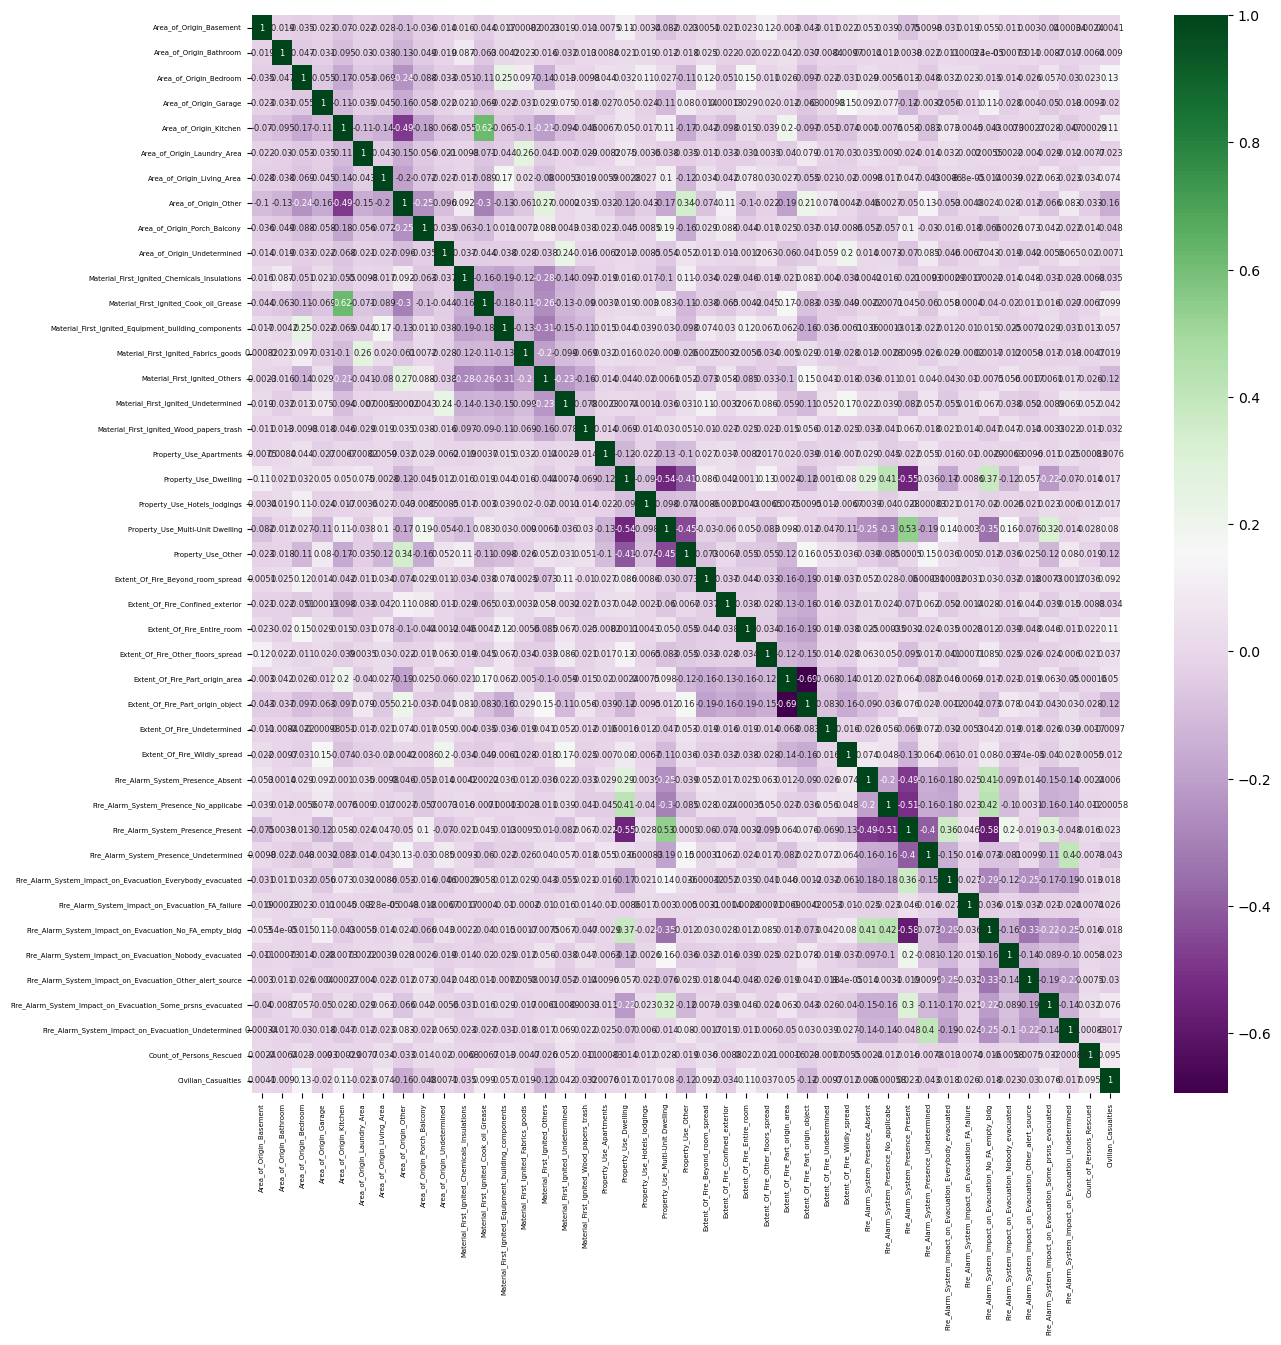

In [85]:
plt.figure(figsize = (14,14))
sns.heatmap(final_fire_data.corr(), cmap="PRGn", annot = True, annot_kws={'size':6})
plt.tick_params(labelsize=5)
plt.show()

In [86]:
final_fire_data.columns

Index(['Area_of_Origin_Basement', 'Area_of_Origin_Bathroom',
       'Area_of_Origin_Bedroom', 'Area_of_Origin_Garage',
       'Area_of_Origin_Kitchen', 'Area_of_Origin_Laundry_Area',
       'Area_of_Origin_Living_Area', 'Area_of_Origin_Other',
       'Area_of_Origin_Porch_Balcony', 'Area_of_Origin_Undetermined',
       'Material_First_Ignited_Chemicals_Insulations',
       'Material_First_Ignited_Cook_oil_Grease',
       'Material_First_Ignited_Equipment_building_components',
       'Material_First_Ignited_Fabrics_goods', 'Material_First_Ignited_Others',
       'Material_First_Ignited_Undetermined',
       'Material_First_Ignited_Wood_papers_trash', 'Property_Use_Apartments',
       'Property_Use_Dwelling', 'Property_Use_Hotels_lodgings',
       'Property_Use_Multi-Unit Dwelling', 'Property_Use_Other',
       'Extent_Of_Fire_Beyond_room_spread', 'Extent_Of_Fire_Confined_exterior',
       'Extent_Of_Fire_Entire_room', 'Extent_Of_Fire_Other_floors_spread',
       'Extent_Of_Fire_Part_ori

In [87]:
# prepearing data - spliting to training and testing set
feature_names = ['Area_of_Origin_Basement', 'Area_of_Origin_Bathroom',
       'Area_of_Origin_Bedroom', 'Area_of_Origin_Garage',
       'Area_of_Origin_Kitchen', 'Area_of_Origin_Laundry_Area',
       'Area_of_Origin_Living_Area', 'Area_of_Origin_Other',
       'Area_of_Origin_Porch_Balcony', 'Area_of_Origin_Undetermined',
       'Material_First_Ignited_Chemicals_Insulations',
       'Material_First_Ignited_Cook_oil_Grease',
       'Material_First_Ignited_Equipment_building_components',
       'Material_First_Ignited_Fabrics_goods',
       'Material_First_Ignited_Others', 'Material_First_Ignited_Undetermined',
       'Material_First_Ignited_Wood_papers_trash', 'Property_Use_Apartments',
       'Property_Use_Dwelling', 'Property_Use_Hotels_lodgings',
       'Property_Use_Multi-Unit Dwelling', 'Property_Use_Other',
       'Extent_Of_Fire_Beyond_room_spread', 'Extent_Of_Fire_Confined_exterior',
       'Extent_Of_Fire_Entire_room', 'Extent_Of_Fire_Other_floors_spread',
       'Extent_Of_Fire_Part_origin_area', 'Extent_Of_Fire_Part_origin_object',
       'Extent_Of_Fire_Undetermined', 'Extent_Of_Fire_Wildly_spread',
       'Fire_Alarm_System_Presence_Absent',
       'Fire_Alarm_System_Presence_No_applicabe',
       'Fire_Alarm_System_Presence_Present',
       'Fire_Alarm_System_Presence_Undetermined',
       'Fire_Alarm_System_Impact_on_Evacuation_Everybody_evacuated',
       'Fire_Alarm_System_Impact_on_Evacuation_FA_failure',
       'Fire_Alarm_System_Impact_on_Evacuation_No_FA_empty_bldg',
       'Fire_Alarm_System_Impact_on_Evacuation_Nobody_evacuated',
       'Fire_Alarm_System_Impact_on_Evacuation_Other_alert_source',
       'Fire_Alarm_System_Impact_on_Evacuation_Some_prsns_evacuated',
       'Fire_Alarm_System_Impact_on_Evacuation_Undetermined',
       'Count_of_Persons_Rescued']

X_train, X_test, y_train, y_test = train_test_split(final_fire_data[feature_names], final_fire_data['Civilian_Casualties'], test_size=0.4, random_state=42)


In [88]:
X_train

Area_of_Origin_Basement  Area_of_Origin_Bathroom  \
6948                        0                        0   
7251                        0                        0   
5703                        1                        0   
5740                        0                        0   
4575                        0                        0   
...                       ...                      ...   
5734                        0                        0   
5191                        0                        0   
5390                        0                        0   
860                         0                        0   
7270                        0                        0   

      Area_of_Origin_Bedroom  Area_of_Origin_Garage  Area_of_Origin_Kitchen  \
6948                       0                      0                       1   
7251                       0                      0                       0   
5703                       0                      0                       0   
5740                       0                      0                       0   
4575                       0                      0                       1   
...                      ...                    ...                     ...   
5734                       0                      0                       0   
5191                       0                      0                       0   
5390                       0                      0                       0   
860                        0                      0                       1   
7270                       0                      0                       0   

      Area_of_Origin_Laundry_Area  Area_of_Origin_Living_Area  \
6948                            0                           0   
7251                            0                           0   
5703                            0                           0   
5740                            0                           0   
4575                            0                           0   
...                           ...                         ...   
5734                            0                           0   
5191                            0                           0   
5390                            0                           0   
860                             0                           0   
7270                            0                           0   

      Area_of_Origin_Other  Area_of_Origin_Porch_Balcony  \
6948                     0                             0   
7251                     1                             0   
5703                     0                             0   
5740                     1                             0   
4575                     0                             0   
...                    ...                           ...   
5734                     1                             0   
5191                     1                             0   
5390                     1                             0   
860                      0                             0   
7270                     0                             1   

      Area_of_Origin_Undetermined  ...  Fire_Alarm_System_Presence_Present  \
6948                            0  ...                                   1   
7251                            0  ...                                   1   
5703                            0  ...                                   0   
5740                            0  ...                                   0   
4575                            0  ...                                   0   
...                           ...  ...                                 ...   
5734                            0  ...                                   1   
5191                            0  ...                                   1   
5390                            0  ...                                   0   
860                             0  ...                                   1   


In [89]:
y_train.value_counts()

0    6151
1     577
Name: Civilian_Casualties, dtype: int64

In [90]:
y_test.value_counts()

0    4112
1     374
Name: Civilian_Casualties, dtype: int64

In [91]:
# summarize class distribution
print(Counter(y_train))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X, y = over.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_train_ch, y_train_ch = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y_train_ch))

Counter({0: 6151, 1: 577})
Counter({0: 6151, 1: 3075})
Counter({0: 6150, 1: 3075})


In [92]:
# # define pipeline
# over = RandomOverSampler(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)

In [93]:
# creating model - RandomForest

randmfor_class1 = RandomForestClassifier(random_state=1, max_depth=5, min_samples_split=10, min_samples_leaf=5)
randmfor_class1 = randmfor_class1.fit(X_train_ch, y_train_ch)

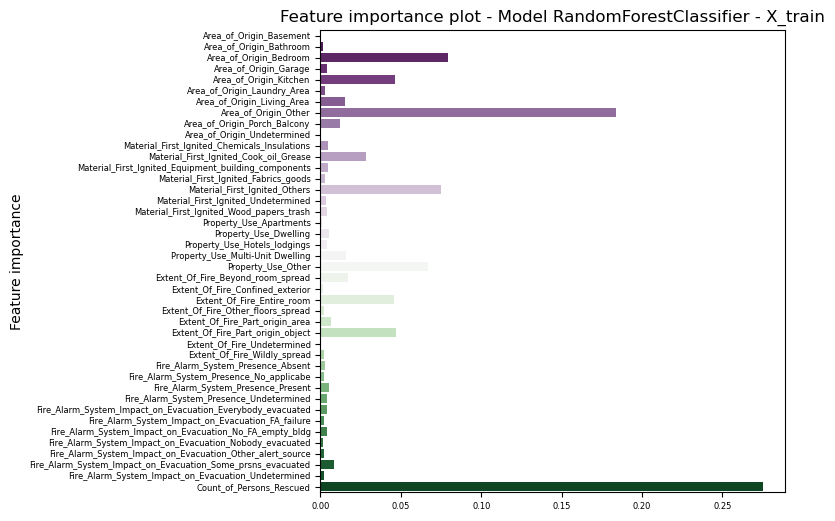

In [94]:
# checking feature importances in model
randmfor_importances = randmfor_class1.feature_importances_
plt.figure(figsize = (6,6))
sns.barplot(x=randmfor_importances,y= X_train_ch.columns, palette="PRGn")
plt.title("Feature importance plot - Model RandomForestClassifier - X_train")
plt.ylabel("Feature importance")
plt.tick_params(labelsize=6)
plt.show()

In [95]:
randmfor_class_imp = pd.DataFrame(randmfor_class1.feature_importances_, randmfor_class1.feature_names_in_, columns=['importance']).sort_values('importance',ascending=False)
randmfor_class_imp

importance
Count_of_Persons_Rescued                                 0.275
Area_of_Origin_Other                                     0.184
Area_of_Origin_Bedroom                                   0.079
Material_First_Ignited_Others                            0.075
Property_Use_Other                                       0.067
Extent_Of_Fire_Part_origin_object                        0.047
Area_of_Origin_Kitchen                                   0.046
Extent_Of_Fire_Entire_room                               0.046
Material_First_Ignited_Cook_oil_Grease                   0.028
Extent_Of_Fire_Beyond_room_spread                        0.017
Property_Use_Multi-Unit Dwelling                         0.016
Area_of_Origin_Living_Area                               0.015
Area_of_Origin_Porch_Balcony                             0.012
Fire_Alarm_System_Impact_on_Evacuation_Some_prs...       0.008
Extent_Of_Fire_Part_origin_area                          0.006
Fire_Alarm_System_Presence_Present                       0.005
Property_Use_Dwelling                                    0.005
Material_First_Ignited_Equipment_building_compo...       0.005
Material_First_Ignited_Chemicals_Insulations             0.005
Fire_Alarm_System_Presence_Undetermined                  0.004
Fire_Alarm_System_Impact_on_Evacuation_No_FA_em...       0.004
Fire_Alarm_System_Impact_on_Evacuation_Everybod...       0.004
Property_Use_Hotels_lodgings                             0.004
Area_of_Origin_Garage                                    0.004
Material_First_Ignited_Wood_papers_trash                 0.004
Material_First_Ignited_Undetermined                      0.004
Fire_Alarm_System_Presence_Absent                        0.003
Material_First_Ignited_Fabrics_goods                     0.003
Area_of_Origin_Laundry_Area                              0.003
Fire_Alarm_System_Impact_on_Evacuation_Other_al...       0.002
Fire_Alarm_System_Presence_No_applicabe                  0.002
Fire_Alarm_System_Impact_on_Evacuation_FA_failure        0.002
Fire_Alarm_System_Impact_on_Evacuation_Undeterm...       0.002
Extent_Of_Fire_Other_floors_spread                       0.002
Extent_Of_Fire_Wildly_spread                             0.002
Area_of_Origin_Bathroom                                  0.002
Fire_Alarm_System_Impact_on_Evacuation_Nobody_e...       0.002
Extent_Of_Fire_Confined_exterior                         0.001
Property_Use_Apartments                                  0.001
Area_of_Origin_Basement                                  0.001
Area_of_Origin_Undetermined                              0.000
Extent_Of_Fire_Undetermined                              0.000

In [96]:
print(randmfor_class1.score(X_train_ch, y_train_ch))
print(randmfor_class1.score(X_test, y_test))

0.747750677506775
0.9155149353544361


In [97]:
# Statistic for model
randmfor_class_pred1_train = randmfor_class1.predict(X_train_ch)
randmfor_class_pred1_test = randmfor_class1.predict(X_test)

print('Metrics for Model - train data:')
print(classification_report(y_train_ch, randmfor_class_pred1_train))

print('Metrics for Model - test data:')
print(classification_report(y_test, randmfor_class_pred1_test))

print('--------------------')
print('Balanced_accuracy:')
print(balanced_accuracy_score(y_test, randmfor_class_pred1_test))

print('--------------------')
print('Confusion matrix:')
print(confusion_matrix(y_test, randmfor_class_pred1_test))

Metrics for Model - train data:
              precision    recall  f1-score   support

           0       0.73      0.97      0.84      6150
           1       0.85      0.29      0.44      3075

    accuracy                           0.75      9225
   macro avg       0.79      0.63      0.64      9225
weighted avg       0.77      0.75      0.70      9225

Metrics for Model - test data:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4112
           1       0.49      0.28      0.35       374

    accuracy                           0.92      4486
   macro avg       0.71      0.63      0.65      4486
weighted avg       0.90      0.92      0.90      4486

--------------------
Balanced_accuracy:
0.6257835421044966
--------------------
Confusion matrix:
[[4003  109]
 [ 270  104]]


0.8135529645052548
0.7743974203583095


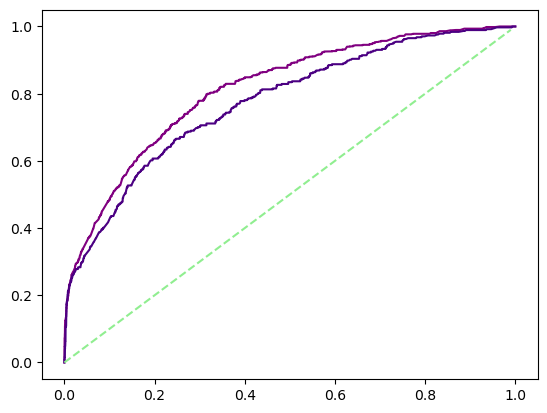

In [98]:
# Krzywa ROC

ramforest_train_proba =  randmfor_class1.predict_proba(X_train_ch)[:,1]
ramforest_test_proba = randmfor_class1.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train_ch,ramforest_train_proba))
print(roc_auc_score(y_test, ramforest_test_proba))

fpr_train, tpr_train, thresholds = roc_curve(y_train_ch, ramforest_train_proba)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,ramforest_test_proba)

plt.plot(fpr_train,tpr_train, color='purple')
plt.plot(fpr_test,tpr_test, color = 'indigo')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--', color='lightgreen')
plt.show()

In [154]:

def grid_combination(grid):
    total_params = 1 
    for par in grid:
        total_params  = total_params * len(grid[par])
    return total_params

In [157]:
param_grid1 = {"max_depth": [2, 3, 5, 10, 15],
              "n_estimators": [50, 100, 200],
              "min_samples_leaf": [1, 2, 3, 5],
              "random_state": [0, 1], 
              "min_samples_split": [1, 2, 5, 10]
             }
print(param_grid1)

print(f'Number of all combinations: {grid_combination(param_grid1)}')

{'max_depth': [2, 3, 5, 10, 15], 'n_estimators': [50, 100, 200], 'min_samples_leaf': [1, 2, 3, 5], 'random_state': [0, 1], 'min_samples_split': [1, 2, 5, 10]}
Number of all combinations: 480


In [158]:
randmfor_class_grid1 = RandomForestClassifier(random_state=1)
grid_search1 = GridSearchCV(randmfor_class_grid1,param_grid=param_grid1,cv=3,verbose=0)
grid_search1.fit(X_train_ch,y_train_ch)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'random_state': [0, 1]})

In [159]:
grid_search1.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 0}

#### XBoost na tych samych danych

In [152]:
xgb_cl = xgb.XGBClassifier(random_state=42, n_estimators=20, max_depth=2, learning_rate = 0.1, booster='gbtree',  eval_metric='error', objective='binary:logistic')
xgb_cl.fit(X_train_ch, y_train_ch)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [153]:
# Statistic for xboost model nr 1 

xgb_cl_pred_train = xgb_cl.predict(X_train_ch)
xgb_cl_pred_test = xgb_cl.predict(X_test)

print('Metrics for Model - train data:')
print(classification_report(y_train_ch, xgb_cl_pred_train))

print('Metrics for Model - test data:')
print(classification_report(y_test, xgb_cl_pred_test))
print('--------------------')
print('Balanced_accuracy:')
print(balanced_accuracy_score(y_test, xgb_cl_pred_test))

print('--------------------')
print('Confusion matrix:')
print(confusion_matrix(y_test, xgb_cl_pred_test))

Metrics for Model - train data:
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      6150
           1       0.91      0.22      0.35      3075

    accuracy                           0.73      9225
   macro avg       0.81      0.60      0.59      9225
weighted avg       0.78      0.73      0.67      9225

Metrics for Model - test data:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4112
           1       0.66      0.24      0.35       374

    accuracy                           0.93      4486
   macro avg       0.80      0.61      0.65      4486
weighted avg       0.91      0.93      0.91      4486

--------------------
Balanced_accuracy:
0.6120536736095217
--------------------
Confusion matrix:
[[4066   46]
 [ 286   88]]


### Drugi próbny model - mniejsza ilosc zmiannych

In [99]:
features_new_model = [  'Area_of_Origin_Other','Material_First_Ignited_Others', 'Extent_Of_Fire_Part_origin_object',
                      'Property_Use_Other', 'Area_of_Origin_Kitchen', 'Area_of_Origin_Bedroom', 'Extent_Of_Fire_Entire_room', 'Material_First_Ignited_Cook_oil_Grease'
                      ,'Property_Use_Multi-Unit Dwelling', 'Fire_Alarm_System_Impact_on_Evacuation_Some_prsns_evacuated', 'Count_of_Persons_Rescued']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(final_fire_data[features_new_model], final_fire_data['Civilian_Casualties'], test_size=0.4, random_state=42)

Count_of_Persons_Rescued	0.390
Area_of_Origin_Other	0.207
Material_First_Ignited_Others	0.087
Extent_Of_Fire_Part_origin_object	0.064
Property_Use_Other	0.063
Area_of_Origin_Kitchen	0.044
Area_of_Origin_Bedroom	0.040
Extent_Of_Fire_Entire_room	0.024
Fire_Alarm_System_Impact_on_Evacuation_Some_prsns_evacuated	0.017
Material_First_Ignited_Cook_oil_Grease	0.017
Extent_Of_Fire_Beyond_room_spread	0.015
Property_Use_Multi-Unit Dwelling	0.008
Fire_Alarm_System_Presence_Undetermined	0.008
Area_of_Origin_Living_Area	0.006
Fire_Alarm_System_Impact_on_Evacuation_Undetermined	0.006
Area_of_Origin_Garage	0.005

In [100]:
y_train_2.value_counts()

0    6151
1     577
Name: Civilian_Casualties, dtype: int64

In [101]:
# summarize class distribution
print(Counter(y_train_2))
# define oversampling strategy
over1 = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_2, y_2 = over1.fit_resample(X_train_2, y_train_2)
# summarize class distribution
print(Counter(y_2))
# define undersampling strategy
under1 = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_train_ch2, y_train_ch2 = under1.fit_resample(X_2, y_2)
# summarize class distribution
print(Counter(y_train_ch2))

Counter({0: 6151, 1: 577})
Counter({0: 6151, 1: 3075})
Counter({0: 6150, 1: 3075})


In [102]:
# # define pipeline
# over = RandomOverSampler(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under), ('m', RandomForestClassifier())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X_train_2, y_train_2, scoring='f1_micro', cv=cv, n_jobs=-1)
# score = mean(scores)
# print('F1 Score: %.3f' % score)

In [103]:
# creating model - RandomForest

randmfor_class2 = RandomForestClassifier(random_state=1, max_depth=5, min_samples_split=5, min_samples_leaf=1, n_estimators=100)
randmfor_class2 = randmfor_class2.fit(X_train_ch2, y_train_ch2)

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100,
 'random_state': 1}

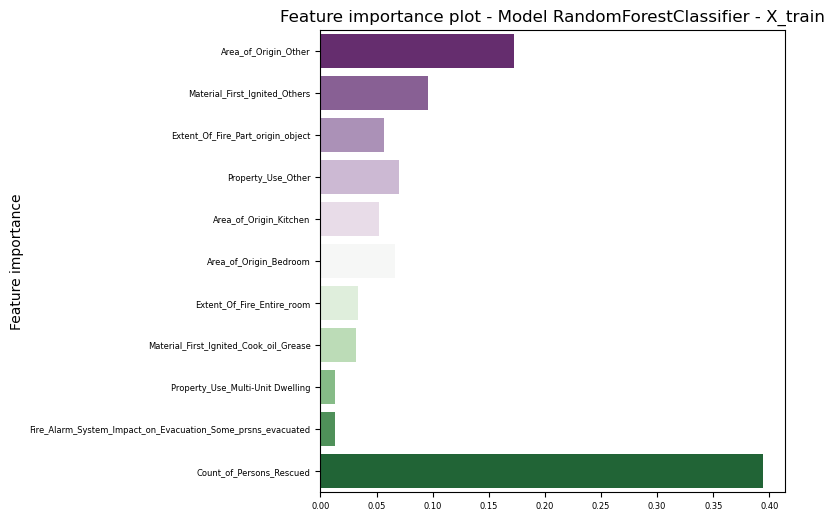

In [104]:
# checking feature importances in model
randmfor_importances2 = randmfor_class2.feature_importances_
plt.figure(figsize = (6,6))
sns.barplot(x=randmfor_importances2,y= X_train_ch2.columns, palette="PRGn")
plt.title("Feature importance plot - Model RandomForestClassifier - X_train")
plt.ylabel("Feature importance")
plt.tick_params(labelsize=6)
plt.show()

In [105]:
randmfor_class_imp2 = pd.DataFrame(randmfor_class2.feature_importances_, randmfor_class2.feature_names_in_, columns=['importance']).sort_values('importance',ascending=False)
randmfor_class_imp2

importance
Count_of_Persons_Rescued                                 0.395
Area_of_Origin_Other                                     0.172
Material_First_Ignited_Others                            0.096
Property_Use_Other                                       0.070
Area_of_Origin_Bedroom                                   0.066
Extent_Of_Fire_Part_origin_object                        0.057
Area_of_Origin_Kitchen                                   0.052
Extent_Of_Fire_Entire_room                               0.034
Material_First_Ignited_Cook_oil_Grease                   0.032
Fire_Alarm_System_Impact_on_Evacuation_Some_prs...       0.013
Property_Use_Multi-Unit Dwelling                         0.013

In [106]:
print(randmfor_class2.score(X_train_ch2, y_train_ch2))
print(randmfor_class2.score(X_test_2, y_test_2))

0.7482926829268293
0.8943379402585823


In [107]:
# Statistic for model
randmfor_class_pred_train = randmfor_class2.predict(X_train_ch2)
randmfor_class_pred_test = randmfor_class2.predict(X_test_2)

print('Metrics for Model - train data:')
print(classification_report(y_train_ch2, randmfor_class_pred_train))

print('Metrics for Model - test data:')
print(classification_report(y_test_2, randmfor_class_pred_test))

print('--------------------')
print('Balanced_accuracy:')
print(balanced_accuracy_score(y_test_2, randmfor_class_pred_test))

print('--------------------')
print('Confusion matrix:')
print(confusion_matrix(y_test_2, randmfor_class_pred_test))

Metrics for Model - train data:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      6150
           1       0.78      0.35      0.48      3075

    accuracy                           0.75      9225
   macro avg       0.76      0.65      0.66      9225
weighted avg       0.75      0.75      0.72      9225

Metrics for Model - test data:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4112
           1       0.36      0.33      0.34       374

    accuracy                           0.89      4486
   macro avg       0.65      0.64      0.64      4486
weighted avg       0.89      0.89      0.89      4486

--------------------
Balanced_accuracy:
0.637322743918933
--------------------
Confusion matrix:
[[3889  223]
 [ 251  123]]


0.8043621389384625
0.770999253521713


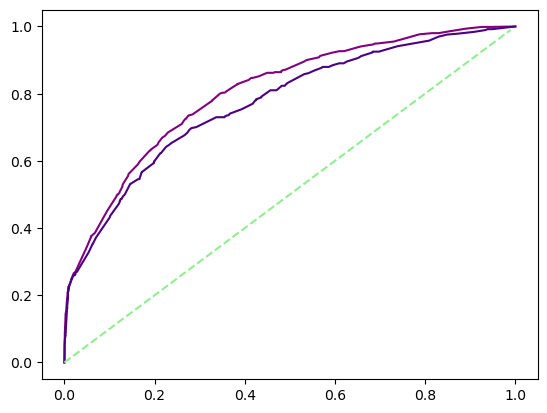

In [108]:
# Krzywa ROC

ramforest_train_proba2 =  randmfor_class2.predict_proba(X_train_ch2)[:,1]
ramforest_test_proba2 = randmfor_class2.predict_proba(X_test_2)[:,1]

print(roc_auc_score(y_train_ch2,ramforest_train_proba2))
print(roc_auc_score(y_test_2, ramforest_test_proba2))

fpr_train2, tpr_train2, thresholds2 = roc_curve(y_train_ch2, ramforest_train_proba2)
fpr_test2, tpr_test2, thresholds_test2 = roc_curve(y_test_2,ramforest_test_proba2)

plt.plot(fpr_train2,tpr_train2, color='purple')
plt.plot(fpr_test2,tpr_test2, color = 'indigo')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--', color='lightgreen')
plt.show()

#### XGBoost - na tych samych danych

In [109]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
import sklearn.model_selection as msel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, precision_recall_curve, confusion_matrix, balanced_accuracy_score

In [110]:
xgb_cl = xgb.XGBClassifier(random_state=42, n_estimators=30, max_depth=4, booster='gbtree',  eval_metric='rmse', learning_rate= 0.3, objective='binary:logitraw')
xgb_cl.fit(X_train_ch2, y_train_ch2)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              objective='binary:logitraw', predictor=None, ...)

In [111]:
# Statistic for model xgboost
xgb_cl_pred_train = xgb_cl.predict(X_train_ch2)
xgb_cl_pred_test = xgb_cl.predict(X_test_2)

print('Metrics for Model - train data:')
print(classification_report(y_train_ch2, xgb_cl_pred_train))

print('Metrics for Model - test data:')
print(classification_report(y_test_2, xgb_cl_pred_test))
print('--------------------')
print('Balanced_accuracy:')
print(balanced_accuracy_score(y_test_2, xgb_cl_pred_test))

print('--------------------')
print('Confusion matrix:')
print(confusion_matrix(y_test_2, xgb_cl_pred_test))

Metrics for Model - train data:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      6150
           1       0.90      0.26      0.40      3075

    accuracy                           0.74      9225
   macro avg       0.81      0.62      0.62      9225
weighted avg       0.78      0.74      0.69      9225

Metrics for Model - test data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4112
           1       0.50      0.24      0.32       374

    accuracy                           0.92      4486
   macro avg       0.72      0.61      0.64      4486
weighted avg       0.90      0.92      0.90      4486

--------------------
Balanced_accuracy:
0.6068250743877317
--------------------
Confusion matrix:
[[4023   89]
 [ 286   88]]


0.8126947451913544
0.756274514138871


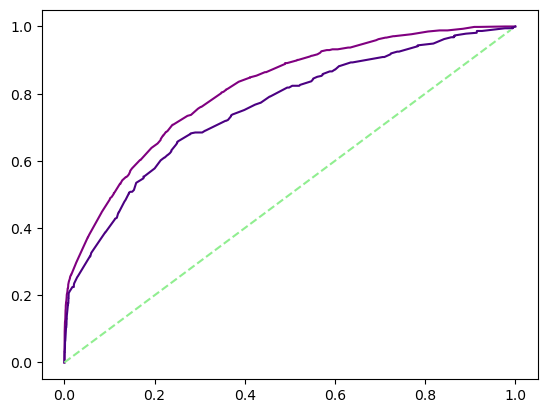

In [112]:
# Krzywa ROC xgboost

xgb_cl_train_proba =  xgb_cl.predict_proba(X_train_ch2)[:,1]
xgb_cl_test_proba = xgb_cl.predict_proba(X_test_2)[:,1]

print(roc_auc_score(y_train_ch2,xgb_cl_train_proba))
print(roc_auc_score(y_test_2, xgb_cl_test_proba))

fpr_train_xb, tpr_train_xb, thresholds_xb = roc_curve(y_train_ch2, xgb_cl_train_proba)
fpr_test_xb, tpr_test_xb, thresholds_test_xb = roc_curve(y_test_2,xgb_cl_test_proba)

plt.plot(fpr_train_xb,tpr_train_xb, color='purple')
plt.plot(fpr_test_xb,tpr_test_xb, color = 'indigo')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--', color='lightgreen')
plt.show()

### Test gridsearch

In [113]:
# Wanted to use gridsearch to optimise chosen parametres of RandomForest model

def grid_combination(grid):
    total_params = 1 
    for par in grid:
        total_params  = total_params * len(grid[par])
    return total_params

In [114]:
param_grid = {"max_depth": [2, 3, 5],
              "n_estimators": [50, 100, 200],
              "min_samples_leaf": [1, 3, 5],
              "random_state": [0, 1], 
              "min_samples_split": [5, 10], 
              "min_samples_leaf": [1, 3, 5]
             }
print(param_grid)

print(f'Number of all combinations: {grid_combination(param_grid)}')

{'max_depth': [2, 3, 5], 'n_estimators': [50, 100, 200], 'min_samples_leaf': [1, 3, 5], 'random_state': [0, 1], 'min_samples_split': [5, 10]}
Number of all combinations: 108


In [115]:
randmfor_class_grid = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(randmfor_class_grid,param_grid=param_grid,cv=3,verbose=0)
grid_search.fit(X_train_ch2,y_train_ch2)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100, 200],
                         'random_state': [0, 1]})

In [116]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50,
 'random_state': 1}

### Optuna tests

In [117]:
import optuna

In [118]:
def objective(trial):
    params = trial.suggest_int('max_depth',2,5)
    m1 = RandomForestClassifier(params)
    m1.fit(X_train_ch2,y_train_ch2)
    return m1.score(X_train_ch2,y_train_ch2)

In [119]:
study= optuna.create_study()
study.optimize(objective,n_trials=10)

[I 2023-05-17 08:30:44,495] A new study created in memory with name: no-name-0617b163-4db5-4420-87c5-286a592a95a4
[I 2023-05-17 08:30:44,562] Trial 0 finished with value: 0.769539295392954 and parameters: {'max_depth': 5}. Best is trial 0 with value: 0.769539295392954.
[I 2023-05-17 08:30:44,614] Trial 1 finished with value: 0.7694308943089431 and parameters: {'max_depth': 3}. Best is trial 1 with value: 0.7694308943089431.
[I 2023-05-17 08:30:44,652] Trial 2 finished with value: 0.7684552845528455 and parameters: {'max_depth': 2}. Best is trial 2 with value: 0.7684552845528455.
[I 2023-05-17 08:30:44,686] Trial 3 finished with value: 0.7672628726287263 and parameters: {'max_depth': 2}. Best is trial 3 with value: 0.7672628726287263.
[I 2023-05-17 08:30:44,750] Trial 4 finished with value: 0.769539295392954 and parameters: {'max_depth': 4}. Best is trial 3 with value: 0.7672628726287263.
[I 2023-05-17 08:30:44,802] Trial 5 finished with value: 0.7692140921409214 and parameters: {'max_d

## proby i cwiczenia z modelem 

In [120]:
# liczebnosc kategorii zmiennych:
for i in fire_data.columns:
    if i in ['Civilian_Casualties','Area_of_Origin', 'Business_Impact', 'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss',
       'Estimated_Number_Of_Persons_Displaced','Extent_Of_Fire', 'Ignition_Source', 'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival']:
        print(f'Liczebności kategorii {i}\n{fire_data[i].value_counts()}')

Liczebności kategorii Area_of_Origin
Cooking Area or Kitchen                                             2870
Porch or Balcony                                                     950
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        868
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     751
Living Area (e.g. living, TV, recreation, etc)                       594
                                                                    ... 
Under Investigation                                                    5
Running Gear (inc wheels and braking systems, transmission syste       4
Incinerator Room                                                       3
Records storage area (inc vaults)                                      2
Fuel Dispensing Area (outside)                                         1
Name: Area_of_Origin, Length: 73, dtype: int64
Liczebności kategorii Business_Impact
Not applicable (not a business)         5104
No business interruption      

In [121]:
nowe_dane = pd.get_dummies(fire_data[['Area_of_Origin', 'Business_Impact', 'Extent_Of_Fire', 'Ignition_Source', 'Material_First_Ignited', 
                                   'Method_Of_Fire_Control', 'Possible_Cause',
                                   'Property_Use', 'Fire_Alarm_System_Impact_on_Evacuation',
                                   'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
                                   'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival']])

In [122]:
nowe_dane.shape

(11214, 514)

In [123]:
df_new_fire_data = fire_data[['Civilian_Casualties', 'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss',
       'Estimated_Number_Of_Persons_Displaced']].join(nowe_dane)

In [124]:
df_new_fire_data['Civilian_Casualties'].loc[df_new_fire_data['Civilian_Casualties']>1] = 1
df_new_fire_data.head()

Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                    0                        86                   3000   
1                    0                        28                  50000   
2                    1                        16                1000000   
3                    0                        12                1000000   
4                    1                        11                 125000   

   Estimated_Number_Of_Persons_Displaced  \
0                                      0   
1                                     28   
2                                    130   
3                                     14   
4                                      2   

   Area_of_Origin_Assembly Area (inc school room,spectator area, church, etc)  \
0                                                  0                            
1                                                  0                            
2                                                  0                            
3                                                  0                            
4                                                  0                            

   Area_of_Origin_Attached Deck  Area_of_Origin_Attic Area  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Area_of_Origin_Awning or Canopy  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   Area_of_Origin_Basement/cellar (not partitioned)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Area_of_Origin_Chimney/Flue Pipe  ...  \
0                                 0  ...   
1                                 0  ...   
2                                 0  ...   
3                                 0  ...   
4                                 0  ...   

   Smoke_Alarm_at_Fire_Origin_Alarm_Type_Type undetermined  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  1         
4                                                  0         

   Smoke_Alarm_at_Fire_Origin_Alarm_Type_Wireless  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Status_of_Fire_On_Arrival_Exposure involved  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Status_of_Fire_On_Arrival_Fire extinguished prior to arrival  \
0                                                  0              
1                                                  1              
2                                                  0              
3                                                  0              
4                                                  0              

   Status_of_Fire_On_Arrival_Fire with no evidence from street  \
0                                                  0             
1                                                  0             
2       

In [125]:
feature_names_n = df_new_fire_data.columns[1:]

In [126]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(df_new_fire_data[feature_names_n], df_new_fire_data['Civilian_Casualties'], test_size=0.4)

In [127]:
# summarize class distribution
print(Counter(y_train_p))
# define oversampling strategy
over_p = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_p, y_p = over_p.fit_resample(X_train_p, y_train_p)
# summarize class distribution
print(Counter(y_p))
# define undersampling strategy
under_p = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_train_chp, y_train_chp = under_p.fit_resample(X_p, y_p)
# summarize class distribution
print(Counter(y_train_chp))

Counter({0: 6141, 1: 587})
Counter({0: 6141, 1: 3070})
Counter({0: 6140, 1: 3070})


In [128]:
randmfor_class_p = RandomForestClassifier(random_state=1, max_depth=5, min_samples_split=10, min_samples_leaf=3, n_estimators = 50)
randmfor_class_p = randmfor_class_p.fit(X_train_chp, y_train_chp)

In [129]:
print('Las Losowy - trening:', randmfor_class_p.score(X_train_chp, y_train_chp))
print('Las Losowy - test:', randmfor_class_p.score(X_test_p, y_test_p))

Las Losowy - trening: 0.711943539630836
Las Losowy - test: 0.9228711547035221


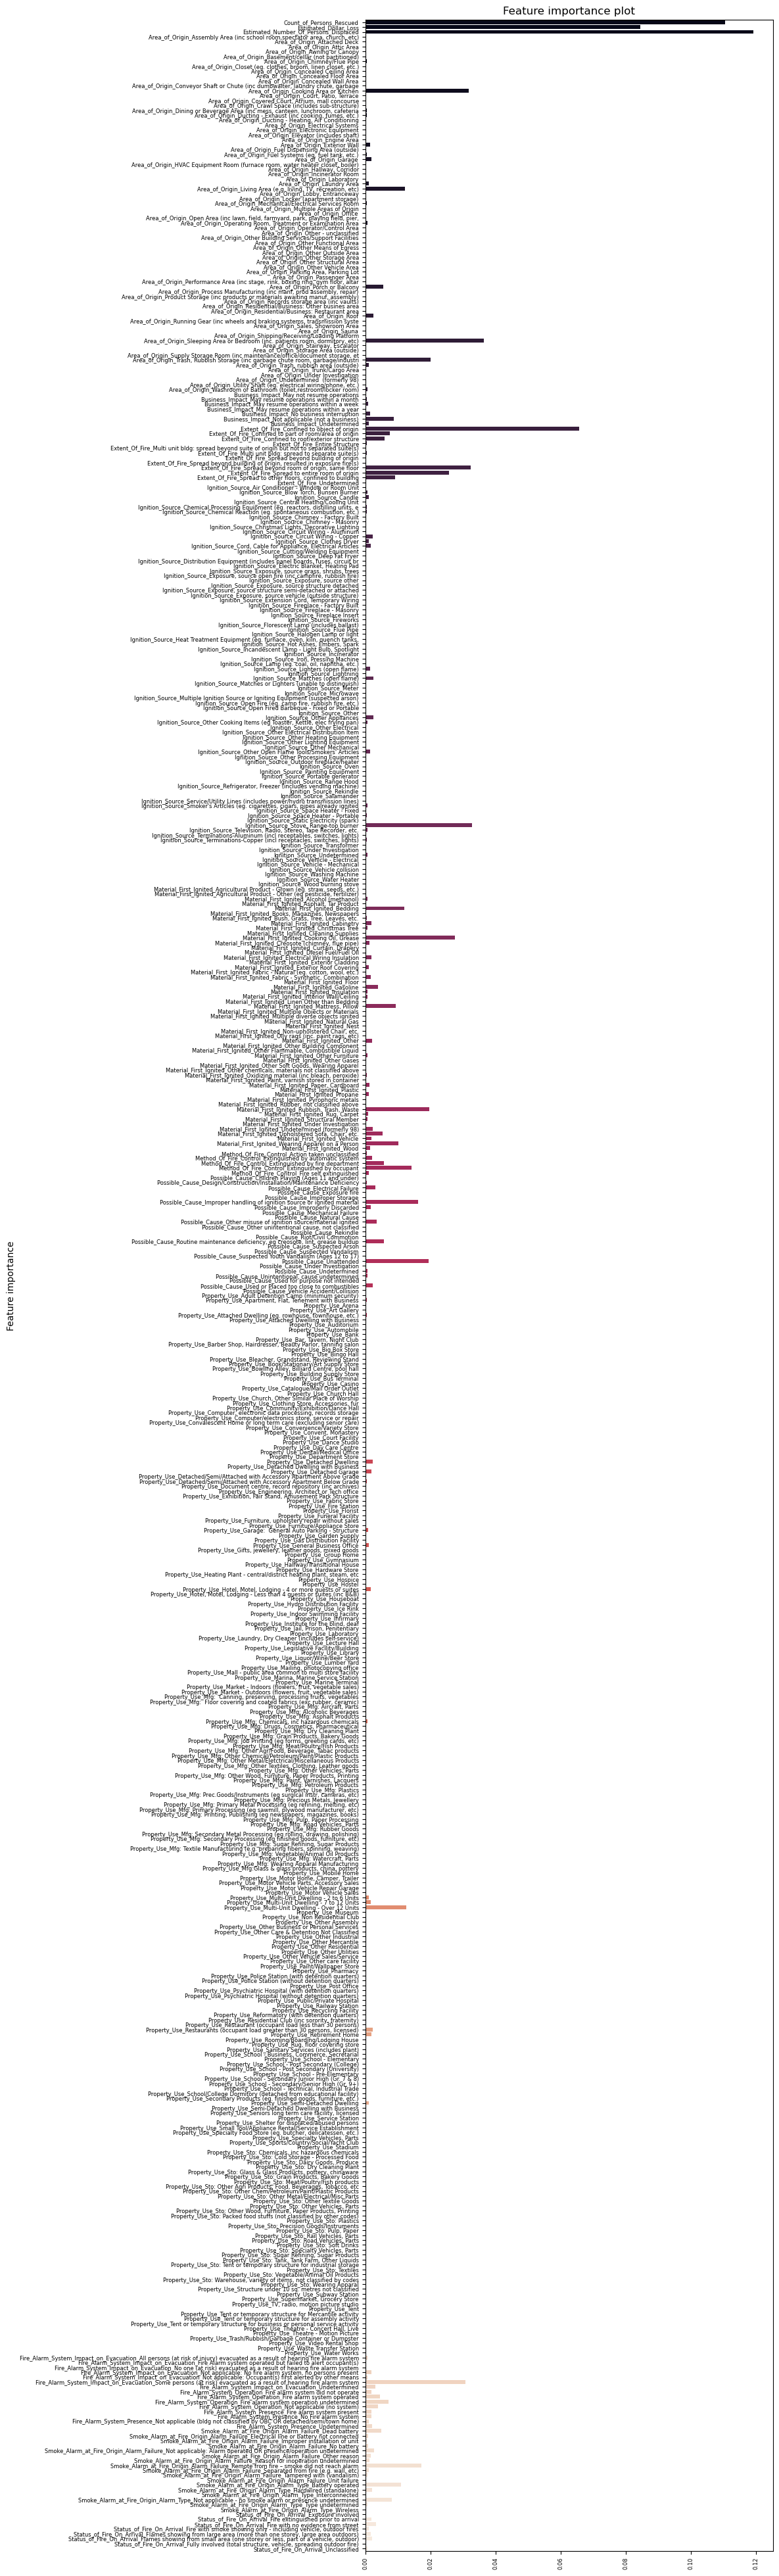

In [130]:
randmfor_importances_p = randmfor_class_p.feature_importances_
plt.figure(figsize = (8,50))
sns.barplot(x=randmfor_importances_p, y=X_train_chp.columns, palette="rocket")
plt.xticks(rotation=90)
plt.title("Feature importance plot")
plt.ylabel("Feature importance")
plt.tick_params(labelsize=6)
plt.show()

In [131]:
randmfor_class_imp_p = pd.DataFrame(randmfor_class_p.feature_importances_, randmfor_class_p.feature_names_in_, columns=['importance']).sort_values('importance',ascending=False)
randmfor_class_imp_p[randmfor_class_imp_p['importance']>=0.005]

importance
Estimated_Number_Of_Persons_Displaced                    0.119
Count_of_Persons_Rescued                                 0.111
Estimated_Dollar_Loss                                    0.084
Extent_Of_Fire_Confined to object of origin              0.066
Area_of_Origin_Sleeping Area or Bedroom (inc. p...       0.036
Ignition_Source_Stove, Range-top burner                  0.033
Extent_Of_Fire_Spread beyond room of origin, sa...       0.032
Area_of_Origin_Cooking Area or Kitchen                   0.032
Fire_Alarm_System_Impact_on_Evacuation_Some per...       0.031
Material_First_Ignited_Cooking Oil, Grease               0.028
Extent_Of_Fire_Spread to entire room of origin           0.026
Area_of_Origin_Trash, Rubbish Storage (inc garb...       0.020
Material_First_Ignited_Rubbish, Trash, Waste             0.020
Possible_Cause_Unattended                                0.020
Smoke_Alarm_at_Fire_Origin_Alarm_Failure_Remote...       0.017
Possible_Cause_Improper handling of ignition so...       0.016
Method_Of_Fire_Control_Extinguished by occupant          0.014
Property_Use_Multi-Unit Dwelling - Over 12 Units         0.013
Area_of_Origin_Living Area (e.g. living, TV, re...       0.012
Material_First_Ignited_Bedding                           0.012
Smoke_Alarm_at_Fire_Origin_Alarm_Type_Battery o...       0.011
Material_First_Ignited_Wearing Apparel on a Person       0.010
Material_First_Ignited_Mattress, Pillow                  0.009
Extent_Of_Fire_Spread to other floors, confined...       0.009
Business_Impact_Not applicable (not a business)          0.009
Smoke_Alarm_at_Fire_Origin_Alarm_Type_Not appli...       0.008
Extent_Of_Fire_Confined to part of room/area of...       0.008
Fire_Alarm_System_Operation_Fire alarm system o...       0.007
Extent_Of_Fire_Confined to roof/exterior structure       0.006
Possible_Cause_Routine maintenance deficiency, ...       0.006
Method_Of_Fire_Control_Extinguished by fire dep...       0.006
Area_of_Origin_Porch or Balcony                          0.005
Material_First_Ignited_Upholstered Sofa, Chair,...       0.005

In [132]:
print(randmfor_class_p.score(X_train_chp, y_train_chp))
print(randmfor_class_p.score(X_test_p, y_test_p))

0.711943539630836
0.9228711547035221


In [133]:
# Statistic for model
randmfor_class_p_pred_train = randmfor_class_p.predict(X_train_chp)
randmfor_class_p_pred_test = randmfor_class_p.predict(X_test_p)

print('Metrics for Model - train data:')
print(classification_report(y_train_chp, randmfor_class_p_pred_train))

print('Metrics for Model - test data:')
print(classification_report(y_test_p, randmfor_class_p_pred_test))

cm6 = confusion_matrix(y_test_p, randmfor_class_p_pred_test)
print(pd.DataFrame(cm6, columns = ['True_class', 'False_class'], index=[0,1]))

Metrics for Model - train data:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      6140
           1       0.94      0.14      0.25      3070

    accuracy                           0.71      9210
   macro avg       0.82      0.57      0.54      9210
weighted avg       0.78      0.71      0.63      9210

Metrics for Model - test data:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4122
           1       0.70      0.09      0.15       364

    accuracy                           0.92      4486
   macro avg       0.81      0.54      0.56      4486
weighted avg       0.91      0.92      0.89      4486

   True_class  False_class
0        4109           13
1         333           31


0.8254428428948848
0.8011074321117989


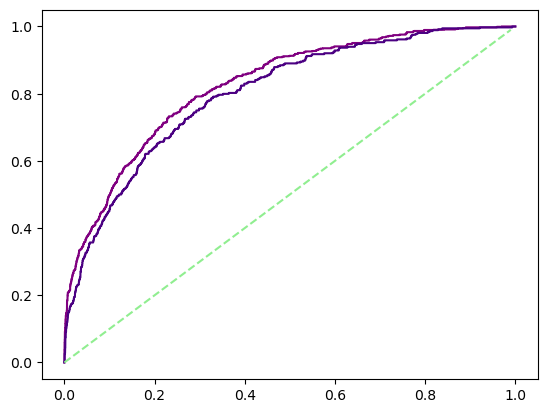

In [134]:
# Krzywa ROC

ramforest_train_proba_p =  randmfor_class_p.predict_proba(X_train_chp)[:,1]
ramforest_test_proba_p = randmfor_class_p.predict_proba(X_test_p)[:,1]

print(roc_auc_score(y_train_chp,ramforest_train_proba_p))
print(roc_auc_score(y_test_p, ramforest_test_proba_p))

fpr_train_p, tpr_train_p, thresholds_p = roc_curve(y_train_chp, ramforest_train_proba_p)
fpr_test_p, tpr_test_p, thresholds_test_p = roc_curve(y_test_p,ramforest_test_proba_p)

plt.plot(fpr_train_p,tpr_train_p, color='purple')
plt.plot(fpr_test_p,tpr_test_p, color = 'indigo')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--', color='lightgreen')
plt.show()